In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import gzip, cPickle

from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa as tsa 
from statsmodels.tsa.stattools import coint

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from statsmodels.tsa.stattools import adfuller as ADF
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from tqdm import tqdm
import pickle
from datetime import datetime as dt
import math

C:\Users\Juntao\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## This step is to download and load all the ETF data

In [22]:
tickers = '''XLK,VGT,IYW,RYT,IGM,XLF,VFH,KBE,IYF,RYF,XLY,VCR,IYC,XRT,RCD,XLV,IBB,VHT,IYH,RYH,XLI,VIS,IYJ,RGI,UXI,XLE,VDE,IYE,RYE,FXN,XLP,VDC,IYK,RHS,FXG,XLB,VAW,IYM,RTM,XME,VOX,IXP,IYZ,IGN,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,FRI,USRT'''.split(',')

# 

In [23]:
len(tickers)

54

In [24]:
%%time
X = pd.DataFrame()
start_date = '2008-01-01'
end_date = '2018-01-31'
data_source = 'yahoo'
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
for i in tickers:
    print i
    etf_data= web.DataReader(i, data_source, start_date, end_date)
    new_col = etf_data[['Adj Close']]
    new_col.columns = [i]
    X =  pd.concat([X, new_col], axis=1)

XLK
VGT
IYW
RYT
IGM
XLF
VFH
KBE
IYF
RYF
XLY
VCR
IYC
XRT
RCD
XLV
IBB
VHT
IYH
RYH
XLI
VIS
IYJ
RGI
UXI
XLE
VDE
IYE
RYE
FXN
XLP
VDC
IYK
RHS
FXG
XLB
VAW
IYM
RTM
XME
VOX
IXP
IYZ
IGN
XLU
VPU
IDU
RYU
PUI
VNQ
IYR
RWR
FRI
USRT
Wall time: 3min 40s


In [25]:
X.head(2)

,XLK,VGT,IYW,RYT,IGM,XLF,VFH,KBE,IYF,RYF,...,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,FRI,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,22.020742,53.123955,55.898281,45.145309,54.325420,14.244242,41.430122,35.045902,76.538673,12.777575,...,28.313034,59.427105,70.855354,41.404549,14.225128,39.793758,41.790146,46.999653,12.066257,34.943848
2008-01-03,22.054464,52.853878,55.670124,44.666416,54.176773,14.153836,41.067986,34.905972,75.875252,12.799932,...,28.272675,59.536751,71.057747,41.582806,14.159471,38.553257,40.436703,45.621338,11.841807,33.640381


In [26]:
pickle.dump(X, open("MPP_ETFs_Production.p", "w"))

In [2]:
# pickle.dump(ETFs_GSPC, open("ETFs_GSPC_MRP_Production.p", "w"))
with gzip.open('ETFs_GSPC_MRP_Production.pkl.gz','r') as f:
    ETFs_GSPC = cPickle.load(f)

In [3]:
ETFs_GSPC.head()

,XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,...,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,22.098740,53.268589,56.017902,45.235744,54.408684,27.862883,NaN,14.305944,41.652599,35.166389,...,59.947933,71.388649,41.737343,14.337612,40.162682,42.196808,47.435150,8.983622,34.976913,1447.160034
2008-01-03,22.132580,52.997772,55.789246,44.755886,54.259819,27.940943,NaN,14.215148,41.288517,35.025986,...,60.058559,71.592514,41.917027,14.271438,38.910671,40.830173,46.044064,8.910232,33.672215,1447.160034
2008-01-04,21.269606,50.750046,53.393055,42.910275,51.757092,26.646067,NaN,13.811594,40.147667,33.836712,...,59.899540,71.543304,41.633671,14.278792,37.330921,39.534801,44.102032,8.794044,32.376438,1411.630005
2008-01-07,21.083485,50.280647,52.890045,42.310459,51.347736,26.297098,NaN,13.846903,40.333759,34.150543,...,60.985104,72.815964,42.158928,14.558186,37.678326,39.903980,44.398148,8.888833,32.447933,1416.180054
2008-01-08,20.525089,48.737019,51.298668,41.396889,49.868423,25.723120,NaN,13.342463,38.836933,32.705246,...,60.950520,72.717522,42.158928,14.455253,36.373859,38.453159,42.951958,8.757350,31.482798,1390.189941


In [4]:
All_ETFs = ETFs_GSPC.iloc[:, :-1]

In [5]:
All_ETFs.head(5)

,XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,...,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,22.098740,53.268589,56.017902,45.235744,54.408684,27.862883,NaN,14.305944,41.652599,35.166389,...,28.566296,59.947933,71.388649,41.737343,14.337612,40.162682,42.196808,47.435150,8.983622,34.976913
2008-01-03,22.132580,52.997772,55.789246,44.755886,54.259819,27.940943,NaN,14.215148,41.288517,35.025986,...,28.525572,60.058559,71.592514,41.917027,14.271438,38.910671,40.830173,46.044064,8.910232,33.672215
2008-01-04,21.269606,50.750046,53.393055,42.910275,51.757092,26.646067,NaN,13.811594,40.147667,33.836712,...,28.742760,59.899540,71.543304,41.633671,14.278792,37.330921,39.534801,44.102032,8.794044,32.376438
2008-01-07,21.083485,50.280647,52.890045,42.310459,51.347736,26.297098,NaN,13.846903,40.333759,34.150543,...,29.340000,60.985104,72.815964,42.158928,14.558186,37.678326,39.903980,44.398148,8.888833,32.447933
2008-01-08,20.525089,48.737019,51.298668,41.396889,49.868423,25.723120,NaN,13.342463,38.836933,32.705246,...,29.346796,60.950520,72.717522,42.158928,14.455253,36.373859,38.453159,42.951958,8.757350,31.482798


In [6]:
GSPC = pd.DataFrame(ETFs_GSPC.iloc[:, -1])

In [7]:
GSPC.head(5)

,Adj Close
Date,
2008-01-02,1447.160034
2008-01-03,1447.160034
2008-01-04,1411.630005
2008-01-07,1416.180054
2008-01-08,1390.189941


In [8]:
All_ETFs_log = All_ETFs.apply(np.log)
All_ETFs_log.head()

,XLK,VGT,IYW,RYT,IGM,XNTK,PNQI,XLF,VFH,KBE,...,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,REM,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,3.095521,3.975347,4.025671,3.811888,3.996524,3.327295,NaN,2.660675,3.729364,3.560091,...,3.352228,4.093476,4.268139,3.731396,2.662886,3.692938,3.742345,3.859364,2.195403,3.554688
2008-01-03,3.097051,3.970250,4.021581,3.801223,3.993784,3.330093,NaN,2.654308,3.720584,3.556090,...,3.350801,4.095320,4.270991,3.735692,2.658260,3.661269,3.709421,3.829599,2.187200,3.516673
2008-01-04,3.057279,3.926913,3.977681,3.759111,3.946561,3.282642,NaN,2.625508,3.692564,3.521546,...,3.358386,4.092669,4.270303,3.728909,2.658775,3.619822,3.677181,3.786506,2.174075,3.477431
2008-01-07,3.048490,3.917620,3.968215,3.745034,3.938621,3.269459,NaN,2.628062,3.697189,3.530778,...,3.378952,4.110630,4.287935,3.741446,2.678153,3.629085,3.686476,3.793198,2.184796,3.479637
2008-01-08,3.021648,3.886439,3.937665,3.723206,3.909388,3.247390,NaN,2.590952,3.659372,3.487535,...,3.379183,4.110062,4.286582,3.741446,2.671058,3.593850,3.649441,3.760082,2.169893,3.449441


## Below is to make sure all ETFs are integrated order 1

In [9]:
j = 0
for i in All_ETFs_log.columns:
    etf = All_ETFs_log[[i]].dropna(axis=0,how = 'any')
    pvalue = ADF(etf.values.flatten())[1]
    if pvalue < 0.01:
        print("original %s is stationary, cause pvalues is %s less than 0.01" % (i, pvalue))
    else:
        etf = etf.diff(1).dropna() 
        pvalue = ADF(etf.values.flatten())[1]
        if pvalue < 0.01:
            j+=1
            # print("%s is stationary in first difference , cause pvalues is %s less than 0.01" % (i, pvalue))
        else:
            print("%s is not stationary in first difference, and the p-value is %s" %(i,pvalue))


print('\n')            
print("total number of assests is %s"%(All_ETFs_log.shape[1]))
print('\n')
print ("total number of Integration of order 1 is %s"%(j))



total number of assests is 62


total number of Integration of order 1 is 62


## Drop the short ETFs, then we have 52 ETFs are left, all of them have 2539 days

In [600]:
All_ETFs_log.drop(['RYF','FTXO','PNQI', 'JHMC','PSCH','PSCI','PSCC','PSCM','XTL','REM','RYF','XLF'], axis=1, inplace=True) # 52 ETFs left

In [598]:
All_ETFs_log.head(4)

,XLK,VGT,IYW,RYT,IGM,XNTK,XLF,VFH,KBE,IYF,...,IYZ,XLU,VPU,IDU,RYU,PUI,VNQ,IYR,RWR,USRT
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,3.095521,3.975347,4.025671,3.811888,3.996524,3.327295,2.660675,3.729364,3.560091,4.342348,...,3.080837,3.352228,4.093476,4.268139,3.731396,2.662886,3.692938,3.742345,3.859364,3.554688
2008-01-03,3.097051,3.970250,4.021581,3.801223,3.993784,3.330093,2.654308,3.720584,3.556090,4.333643,...,3.074992,3.350801,4.095320,4.270991,3.735692,2.658260,3.661269,3.709421,3.829599,3.516673
2008-01-04,3.057279,3.926913,3.977681,3.759111,3.946561,3.282642,2.625508,3.692564,3.521546,4.305491,...,3.052323,3.358386,4.092669,4.270303,3.728909,2.658775,3.619822,3.677181,3.786506,3.477431
2008-01-07,3.048490,3.917620,3.968215,3.745034,3.938621,3.269459,2.628062,3.697189,3.530778,4.309081,...,3.063198,3.378952,4.110630,4.287935,3.741446,2.678153,3.629085,3.686476,3.793198,3.479637


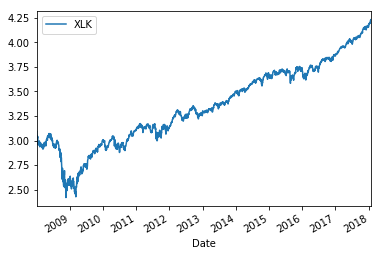

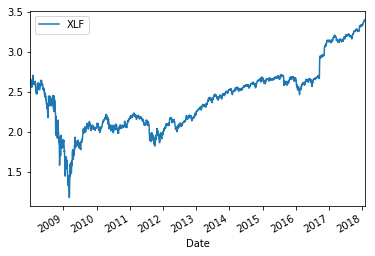

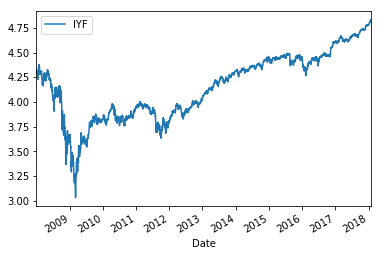

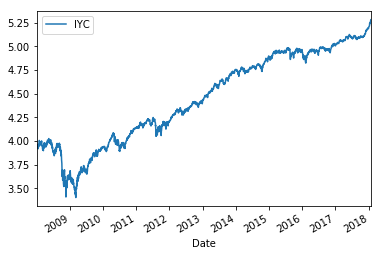

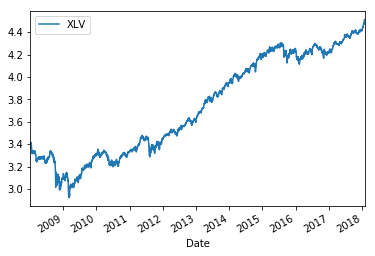

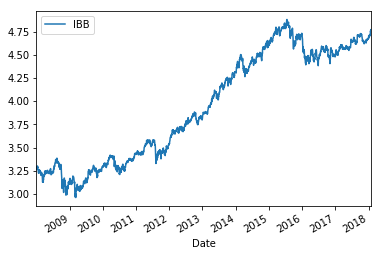

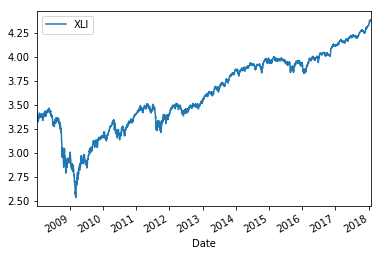

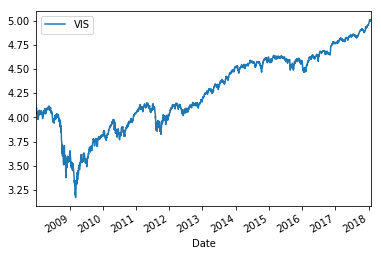

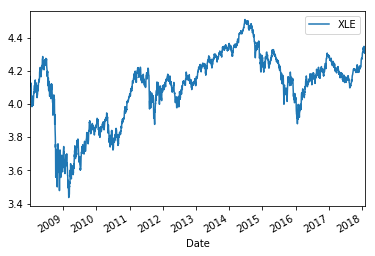

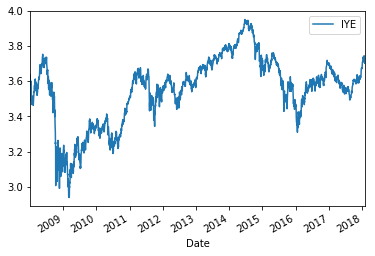

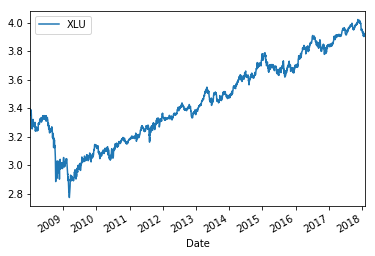

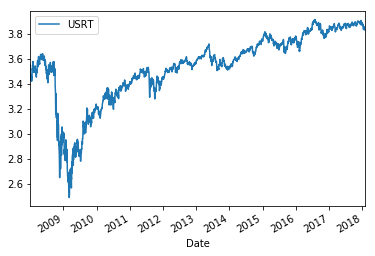

In [596]:
for i in All_ETFs_log_year.columns:
    All_ETFs_log_year[[i]].plot()
    plt.show()

In [11]:
GSPC_log = np.log(GSPC)
GSPC_log.head()

,Adj Close
Date,
2008-01-02,7.277358
2008-01-03,7.277358
2008-01-04,7.252500
2008-01-07,7.255718
2008-01-08,7.237196


## Total we have 10 years data from 2008-01-02.
## We use 6 years to construct portfolio from 2008-01-02 -- 2013-12-31 , total 1511 trading days
## 4 years data as test set from 2014-01-02 -- 2017-12-29, total 1007 trading days

In [12]:
GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()
All_ETFs_log_test = All_ETFs_log.loc["2014-01-01": "2017-12-31"].copy()

# Let's run the regression on  all 52 ETFs, to see the result


In [13]:
LR_all = LinearRegression()
LR_all.fit(All_ETFs_log_train,GSPC_log_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print 'The Coefficients of 52 ETFs are \n', LR_all.coef_

The Coefficients of 52 ETFs are 
[[  1.88621051e-01  -4.41512756e-01   3.76413693e-01   5.39534076e-03
    4.95932629e-02  -9.46907364e-03  -1.01730606e-02  -1.47308732e-02
   -2.27192827e-02   2.61102428e-01  -4.25835900e-02  -1.05058472e-01
    2.10798329e-01   3.24538952e-03   1.95468794e-02   7.12751679e-03
   -4.48452505e-02  -1.26381200e-02  -1.50742936e-02   2.34090273e-01
   -3.34255639e-02   2.91080043e-02   1.38223917e-02   1.35543523e-01
    1.63784917e-03   1.02627806e-01  -1.36214819e-01   1.49317810e-01
    2.01808039e-04  -1.55453644e-02   2.15319029e-02  -1.24940704e-01
    1.97536935e-01   3.66733468e-03  -1.47650687e-02   1.17720983e-01
   -1.74303562e-01   5.60481258e-02  -5.49085717e-02   2.85103704e-02
   -3.59774147e-02   1.03052249e-02   4.32747389e-02   4.98992186e-02
   -1.16989028e-02   8.43234211e-02  -8.89311566e-02   1.12942131e-02
   -3.29887975e-02  -2.36655819e-02  -1.95958591e-03   4.21608259e-02]]


In [15]:
print 'the R-Square of this LR model on all 52 ETF is %.4f%%'%(LR_all.score(All_ETFs_log_train,GSPC_log_train)*100)

the R-Square of this LR model on all 52 ETF is 99.9902%


In [16]:
print("Mean squared error: %.6f"
      % mean_squared_error(GSPC_log_train, LR_all.predict(All_ETFs_log_train)))

Mean squared error: 0.000004


In [17]:
LR_all_residual = GSPC_log_train - LR_all.predict(All_ETFs_log_train)
ADF(LR_all_residual.values.flatten())

(-7.4600970762920369,
 5.3822431216425832e-11,
 24L,
 1486L,
 {'1%': -3.4347582315402434,
  '10%': -2.5678065345286378,
  '5%': -2.863486949792871},
 -14902.416290175308)

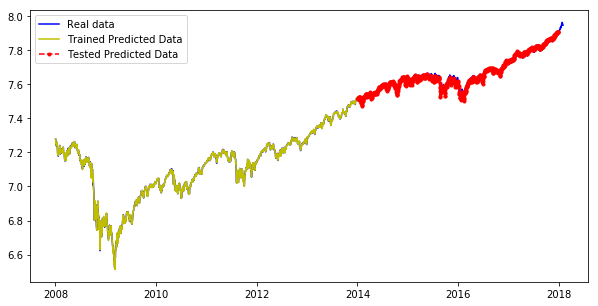

In [18]:
plt.figure(figsize=(10,5))
plt.plot(GSPC_log.index,GSPC_log, 'b-', label='Real data' )
plt.plot(All_ETFs_log_train.index,LR_all.predict(All_ETFs_log_train).flatten(), 'y-', label='Trained Predicted Data' )
plt.plot(All_ETFs_log_test.index,LR_all.predict(All_ETFs_log_test).flatten(), 'r--.',label='Tested Predicted Data')
plt.legend(loc='upper left')
plt.show()

# Let's run LASSO regression on all 53 ETFs, and see the result

In [146]:
# j = 0
# m = 0
# for i in np.arange(0.000001, 0.011, 0.00001):
#     m+=1
#     LR_lasso = Lasso(alpha=i, fit_intercept=True,normalize=None)
#     LR_lasso.fit(All_ETFs_log_train,GSPC_log_train)
#     LR_lasso_residual = GSPC_log_train.values.flatten() - LR_lasso.predict(All_ETFs_log_train)
#     if check_for_stationarity_no_print(LR_lasso_residual.flatten(),cutoff=0.05):
#         j+= 1
#         print '\nthe alpha in LASSO is %s and the P-value for ADF is %s'%(i, ADF(LR_lasso_residual.flatten())[1])
#         print 'with in all coefficients, there are %s ETFs are positive'%(sum(LR_lasso.coef_>0))
#         print 'with in all coefficients, there are %s ETFs are negative'%(sum(LR_lasso.coef_<0))

# print '\n\ntotal %s LR models are stationary'%(j)
# print 'total we tested %s models'%(m)       

In [18]:
# GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()
# GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
# All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()
# All_ETFs_log_test = All_ETFs_log.loc["2014-01-01": "2017-12-31"].copy()

In [601]:
GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()

All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()

portfolio_test = pd.DataFrame(0,columns=['portf_forest','portfolio_test_intercept'] ,index=GSPC_log.loc['2014':'2017'].index)  # this is to store the test data from ETFs

LR_lasso_year = Lasso(alpha=0.000131, fit_intercept=True,normalize=None)

LR_lasso_year.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])

print('original coeff greater than 0 is ',np.sum(LR_lasso_year.coef_ > 0 ))
print('original coeff leass than 0 is ' ,np.sum(LR_lasso_year.coef_ < 0 ))
print('original coeff equal to 0 is ',np.sum(LR_lasso_year.coef_ == 0) )

index_of_etfs = LR_lasso_year.coef_ > 0 # these etfs are our portfolio etfs, we need those to build the portfolio,and to rebalance

All_ETFs_log_year = All_ETFs_log.loc[: , index_of_etfs] .copy()  # this contains all the etfs we used to build portfolio

coefficients= LR_lasso_year.coef_.copy()

nonzero_coeff  = coefficients[~(coefficients==0)].copy()

nonzero_coeff = nonzero_coeff/nonzero_coeff.sum()

portfolio_test.loc['2014','portf_forest'] = All_ETFs_log_year.dot(nonzero_coeff).loc['2014'].copy()

portfolio_test.loc['2014','portfolio_test_intercept'] = portfolio_test.loc['2014','portf_forest']+LR_lasso_year.intercept_

j = 1

for i in pd.date_range(start='2014', end='2017', freq='A'):
    
    Lasso_Model = Lasso(alpha=0.0001 , fit_intercept=True,normalize=None,positive =True)
    
    All_ETFs_log_train = All_ETFs_log_year.loc['2008': i].copy()
   
    GSPC_log_train = GSPC_log.loc['2008': i].copy()
    
    Lasso_Model.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])
    
    print('\n\nfor range in 2008 to'+str(i))
    
    print('number of coeff greater than 0 is ',np.sum(Lasso_Model.coef_ > 0 ))
   
    print('number of coeff leass than 0 is ' ,np.sum(Lasso_Model.coef_ < 0 ))
    
    print('number of coeff equal to 0 is ',np.sum(Lasso_Model.coef_ == 0) )
    
    Lasso_Model_residual = GSPC_log_train[['Adj Close']].values.flatten() - Lasso_Model.predict(All_ETFs_log_train)
   
    check_for_stationarity(Lasso_Model_residual.flatten(),cutoff=0.05)
   
    coefficients= Lasso_Model.coef_.copy()

    coefficients = coefficients/coefficients.sum()
    
    portfolio_test.loc[str(2014+j),'portf_forest'] = All_ETFs_log_year.dot(coefficients).loc[str(2014+j)].copy()
    
    portfolio_test.loc[str(2014+j),'portfolio_test_intercept'] = portfolio_test.loc[str(2014+j),'portf_forest']+Lasso_Model.intercept_

    
    j+=1
    
    print('%sth loop is good'%(j))


('original coeff greater than 0 is ', 9)
('original coeff leass than 0 is ', 0)
('original coeff equal to 0 is ', 42)


for range in 2008 to2014-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 7.80266383268e-05 The series  is likely stationary.
2th loop is good


for range in 2008 to2015-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 0.000315234814555 The series  is likely stationary.
3th loop is good


for range in 2008 to2016-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 0.00117814118739 The series  is likely stationary.
4th loop is good


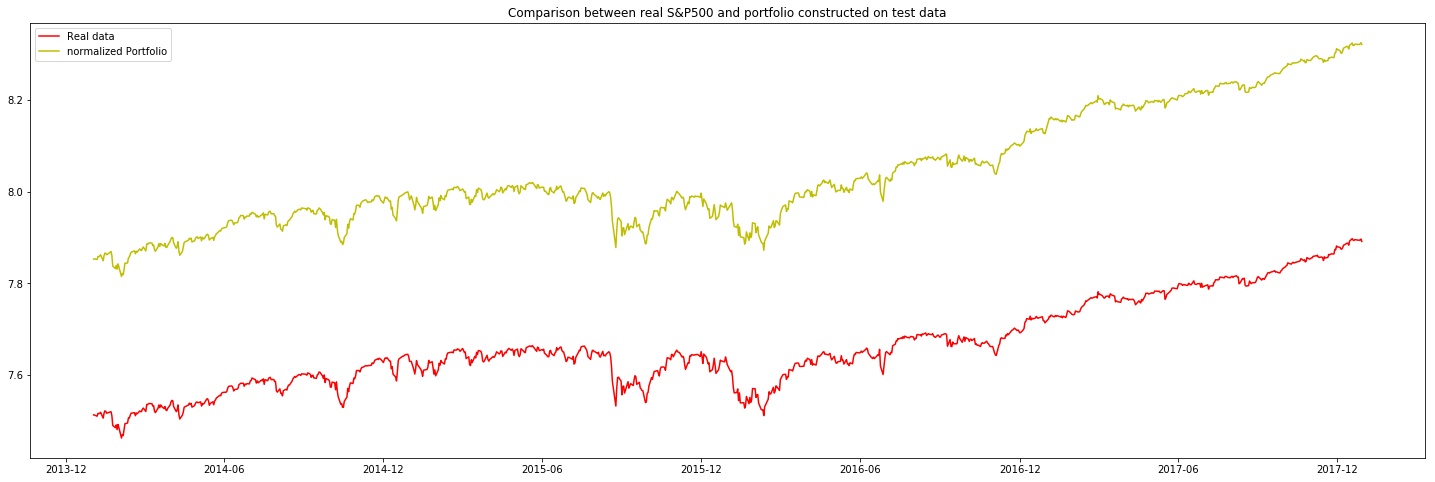

In [602]:
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
plt.figure(figsize=(25,8))
plt.plot(GSPC_log_test.index,GSPC_log_test['Adj Close'], 'r-', label='Real data' )
plt.plot(GSPC_log_test.index,portfolio_test['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'y-', label='normalized Portfolio' )
#plt.plot(All_ETFs_log_test.index,LR_lasso_1.predict(All_ETFs_log_test), 'b-', label='Portfolio data by regular coefficient' )
plt.legend(loc='upper left')
plt.title('Comparison between real S&P500 and portfolio constructed on test data')
plt.show()

In [603]:
GSPC_log_test['Daily_Return'] = GSPC_log_test['Adj Close'].diff()
GSPC_log_test['Daily_Return'][0] = 0
GSPC_log_test['Cumsum Daily_Return'] = GSPC_log_test['Daily_Return'].cumsum()

In [604]:
portfolio_test['Daily_Return'] = portfolio_test['portf_forest'].diff()
portfolio_test['Daily_Return'][0] = 0
portfolio_test['Cumsum Daily_Return'] = portfolio_test['Daily_Return'].cumsum()

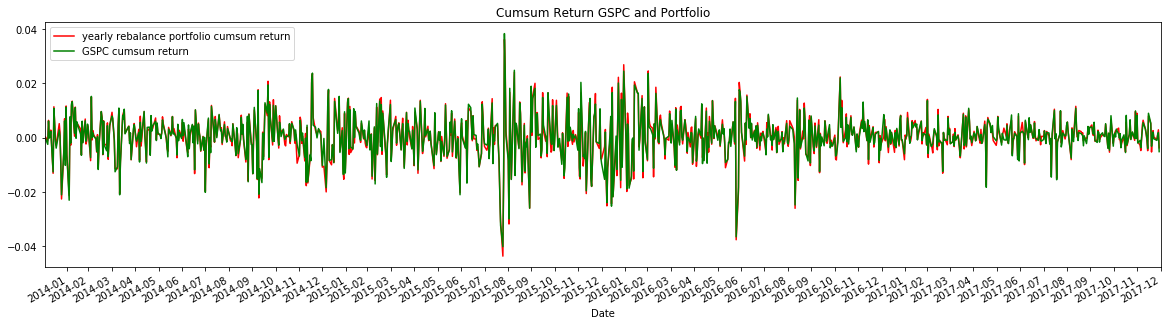

In [605]:
portfolio_test['Daily_Return'].loc["2014-01-01": "2017-12-31"].plot(kind='line',figsize=(20,5),label = 'yearly rebalance portfolio cumsum return',style='r-')
GSPC_log_test['Daily_Return'].loc["2014-01-01": "2017-12-31"].plot(kind='line',figsize=(20,5),label = 'GSPC cumsum return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = 'M'))
plt.title('Cumsum Return GSPC and Portfolio')
plt.show()

In [606]:
Track_error_year = portfolio_test['Daily_Return'] - GSPC_log_test['Daily_Return']

In [607]:
print('Tracking Error Variance is %.6f') %(np.var(Track_error_year))

Tracking Error Variance is 0.000002


In [608]:
np.sum(Track_error_year**2)

0.0017852686512730425

In [609]:
print('Information ratio of the portfolio is %.3f')%(np.mean(Track_error_year)/np.std(Track_error_year))

Information ratio of the portfolio is 0.020


## semi-annual rebalance

In [678]:
GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()

All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()

portfolio_test_semi = pd.DataFrame(0,columns=['portf_forest','portfolio_test_intercept'] ,index=GSPC_log.loc['2014':'2017'].index)  # this is to store the test data from ETFs

LR_lasso_semi = Lasso(alpha=0.000131, fit_intercept=True,normalize=None)

LR_lasso_semi.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])

print('original coeff greater than 0 is ',np.sum(LR_lasso_semi.coef_ > 0 ))
print('original coeff leass than 0 is ' ,np.sum(LR_lasso_semi.coef_ < 0 ))
print('original coeff equal to 0 is ',np.sum(LR_lasso_semi.coef_ == 0) )

index_of_etfs = LR_lasso_semi.coef_ > 0 # these etfs are our portfolio etfs, we need those to build the portfolio,and to rebalance

All_ETFs_log_semi = All_ETFs_log.loc[: , index_of_etfs] .copy()  # this contains all the etfs we used to build portfolio

coefficients= LR_lasso_semi.coef_.copy()

nonzero_coeff  = coefficients[~(coefficients==0)].copy()

nonzero_coeff = nonzero_coeff/nonzero_coeff.sum()

portfolio_test_semi.loc['20140101':'20140630','portf_forest'] = All_ETFs_log_semi.dot(nonzero_coeff).loc['20140101':'20140630'].copy()

portfolio_test_semi.loc['20140101':'20140630','portfolio_test_intercept'] = portfolio_test_semi.loc['20140101':'20140630','portf_forest']+LR_lasso_semi.intercept_

j = 0

semi_dates_begin = pd.date_range(start='2014-07-01', end='2017-07-01', freq='6MS')

semi_dates_end = pd.date_range(start='2014-06-30', end='2017-12-31', freq='6M',closed='right')

for i in pd.date_range(start='2013-12-31', end='2017-06-30', freq='6M',closed='right'):
    
    Lasso_Model = Lasso(alpha=0.0001 , fit_intercept=True,normalize=None,positive =True)
    
    All_ETFs_log_train = All_ETFs_log_semi.loc['2008': i].copy()
   
    GSPC_log_train = GSPC_log.loc['2008': i].copy()
    
    Lasso_Model.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])
    
    print('\n\nfor range in 2008 to'+str(i))
    
    print('number of coeff greater than 0 is ',np.sum(Lasso_Model.coef_ > 0 ))
   
    print('number of coeff leass than 0 is ' ,np.sum(Lasso_Model.coef_ < 0 ))
    
    print('number of coeff equal to 0 is ',np.sum(Lasso_Model.coef_ == 0) )
    
    Lasso_Model_residual = GSPC_log_train[['Adj Close']].values.flatten() - Lasso_Model.predict(All_ETFs_log_train)
   
    check_for_stationarity(Lasso_Model_residual.flatten(),cutoff=0.05)
   
    coefficients= Lasso_Model.coef_.copy()

    coefficients = coefficients/coefficients.sum()
    
    portfolio_test_semi.loc[semi_dates_begin[j]:semi_dates_end[j],'portf_forest'] = All_ETFs_log_semi.dot(coefficients).loc[semi_dates_begin[j]:semi_dates_end[j]].copy()
    
    portfolio_test_semi.loc[semi_dates_begin[j]:semi_dates_end[j],'portfolio_test_intercept'] = portfolio_test_semi.loc[semi_dates_begin[j]:semi_dates_end[j],'portf_forest']+Lasso_Model.intercept_

    
    j+=1
    
    print('%sth loop is good'%(j))


('original coeff greater than 0 is ', 9)
('original coeff leass than 0 is ', 0)
('original coeff equal to 0 is ', 42)


for range in 2008 to2014-06-30 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 5.37376080836e-05 The series  is likely stationary.
1th loop is good


for range in 2008 to2014-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 7.80266383268e-05 The series  is likely stationary.
2th loop is good


for range in 2008 to2015-06-30 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 0.000402777479898 The series  is likely stationary.
3th loop is good


for range in 2008 to2015-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 

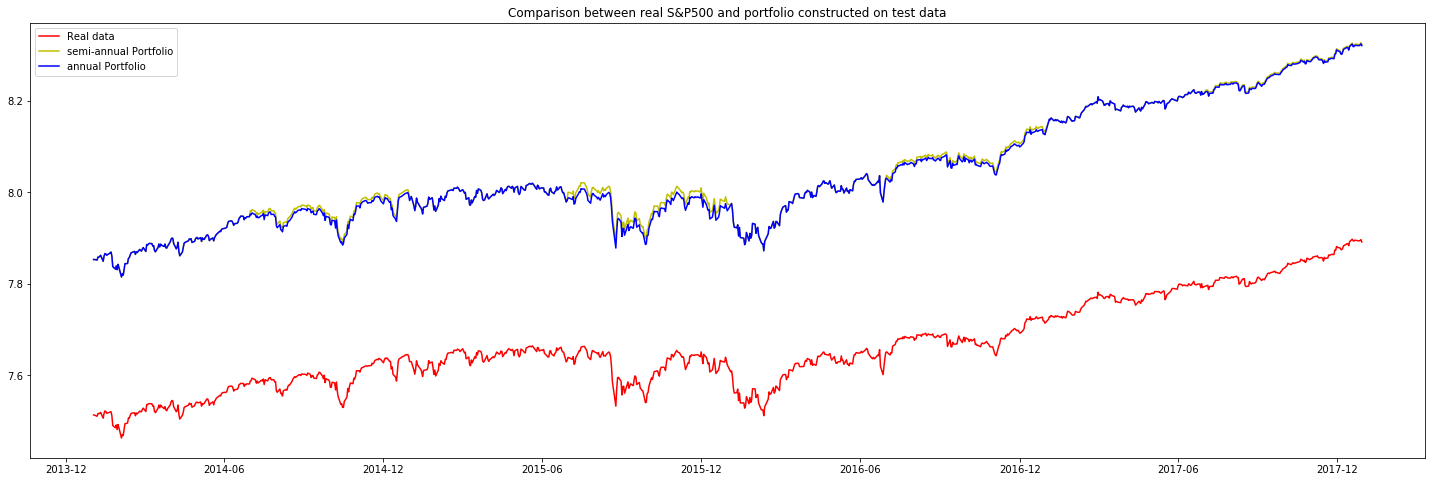

In [681]:
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
plt.figure(figsize=(25,8))
plt.plot(GSPC_log_test.index,GSPC_log_test['Adj Close'], 'r-', label='Real data' )
plt.plot(GSPC_log_test.index,portfolio_test_semi['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'y-', label='semi-annual Portfolio' )
plt.plot(GSPC_log_test.index,portfolio_test['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'b-', label='annual Portfolio' )
plt.legend(loc='upper left')
plt.title('Comparison between real S&P500 and portfolio constructed on test data')
plt.show()

In [693]:
GSPC_log_test['Daily_Return'] = GSPC_log_test['Adj Close'].diff()
GSPC_log_test['Daily_Return'][0] = 0
GSPC_log_test['Cumsum Daily_Return'] = GSPC_log_test['Daily_Return'].cumsum()

In [708]:
portfolio_test_semi['Daily_Return'] = portfolio_test_semi['portf_forest'].diff()
portfolio_test_semi['Daily_Return'][0] = 0
portfolio_test_semi['Cumsum Daily_Return'] = portfolio_test_semi['Daily_Return'].cumsum()

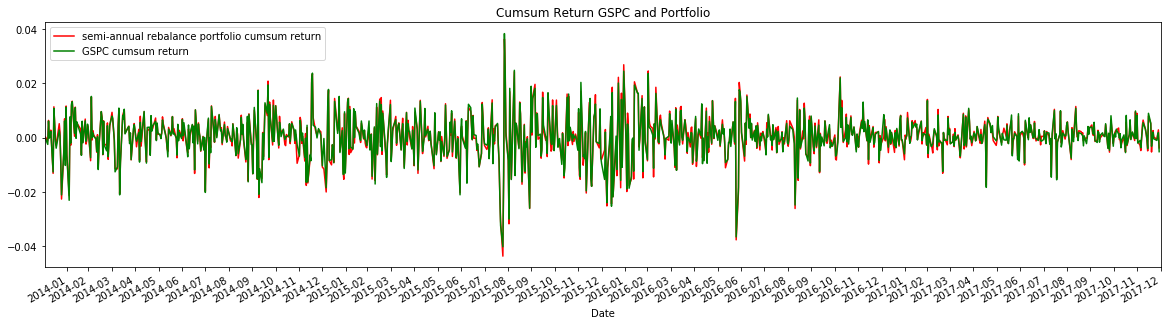

In [709]:
portfolio_test_semi['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'semi-annual rebalance portfolio cumsum return',style='r-')
GSPC_log_test['Daily_Return'].loc["2014-01-01": "2017-12-31"].plot(kind='line',figsize=(20,5),label = 'GSPC cumsum return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = 'M'))
plt.title('Cumsum Return GSPC and Portfolio')
plt.show()

In [710]:
Track_error_semi = portfolio_test_semi['Daily_Return'] - GSPC_log_test['Daily_Return']

In [745]:
print('Semi_annual Tracking Error Variance is %.8f') %(np.var(Track_error_semi))

Semi_annual Tracking Error Variance is 0.00000170


In [713]:
np.sum(Track_error_semi**2)

0.0017113968370890064

In [714]:
print('Information ratio of the Semi-Annual portfolio is %.3f')%(np.mean(Track_error_semi)/np.std(Track_error_semi))

Information ratio of the Semi-Annual portfolio is 0.017


## rebalance quarterly 

In [734]:
GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()

All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()

portfolio_test_quarter = pd.DataFrame(0,columns=['portf_forest','portfolio_test_intercept'] ,index=GSPC_log.loc['2014':'2017'].index)  # this is to store the test data from ETFs

LR_lasso_quarter = Lasso(alpha=0.000131, fit_intercept=True,normalize=None)

LR_lasso_quarter.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])

print('original coeff greater than 0 is ',np.sum(LR_lasso_quarter.coef_ > 0 ))
print('original coeff leass than 0 is ' ,np.sum(LR_lasso_quarter.coef_ < 0 ))
print('original coeff equal to 0 is ',np.sum(LR_lasso_quarter.coef_ == 0) )

index_of_etfs = LR_lasso_quarter.coef_ > 0 # these etfs are our portfolio etfs, we need those to build the portfolio,and to rebalance

All_ETFs_log_quarter = All_ETFs_log.loc[: , index_of_etfs] .copy()  # this contains all the etfs we used to build portfolio

coefficients= LR_lasso_quarter.coef_.copy()

nonzero_coeff  = coefficients[~(coefficients==0)].copy()

nonzero_coeff = nonzero_coeff/nonzero_coeff.sum()

portfolio_test_quarter.loc['2014Q1','portf_forest'] = All_ETFs_log_quarter.dot(nonzero_coeff).loc['2014Q1'].copy()

portfolio_test_quarter.loc['2014Q1','portfolio_test_intercept'] = portfolio_test_quarter.loc['2014Q1','portf_forest']+LR_lasso_semi.intercept_

quarter_dates = [str(i)+j for i in range(2014,2018) for j in ['Q1','Q2','Q3','Q4']]
 
j = 1

for i in pd.date_range(start='2014Q1', end='2017Q4', freq='Q'):   
    
    Lasso_Model = Lasso(alpha=0.0001 , fit_intercept=True,normalize=None,positive =True)
    
    All_ETFs_log_train = All_ETFs_log_quarter.loc['2008': i].copy()
   
    GSPC_log_train = GSPC_log.loc['2008': i].copy()
    
    Lasso_Model.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])
    
    print('\n\nfor range in 2008 to'+str(i))
    
    print('number of coeff greater than 0 is ',np.sum(Lasso_Model.coef_ > 0 ))
   
    print('number of coeff leass than 0 is ' ,np.sum(Lasso_Model.coef_ < 0 ))
    
    print('number of coeff equal to 0 is ',np.sum(Lasso_Model.coef_ == 0) )
    
    Lasso_Model_residual = GSPC_log_train[['Adj Close']].values.flatten() - Lasso_Model.predict(All_ETFs_log_train)
   
    check_for_stationarity(Lasso_Model_residual.flatten(),cutoff=0.05)
   
    coefficients= Lasso_Model.coef_.copy()

    coefficients = coefficients/coefficients.sum()
    
    portfolio_test_quarter.loc[quarter_dates[j],'portf_forest'] = All_ETFs_log_quarter.dot(coefficients).loc[quarter_dates[j]].copy()
    
    portfolio_test_quarter.loc[quarter_dates[j],'portfolio_test_intercept'] = portfolio_test_quarter.loc[quarter_dates[j],'portf_forest']+Lasso_Model.intercept_

    j+=1
    
    print('%sth loop is good'%(j))


('original coeff greater than 0 is ', 9)
('original coeff leass than 0 is ', 0)
('original coeff equal to 0 is ', 42)


for range in 2008 to2014-03-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 0.000102140817014 The series  is likely stationary.
2th loop is good


for range in 2008 to2014-06-30 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 5.37376080836e-05 The series  is likely stationary.
3th loop is good


for range in 2008 to2014-09-30 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 0)
p-value = 1.85561255827e-05 The series  is likely stationary.
4th loop is good


for range in 2008 to2014-12-31 00:00:00
('number of coeff greater than 0 is ', 9)
('number of coeff leass than 0 is ', 0)
('number of coeff equal to 0 is ', 

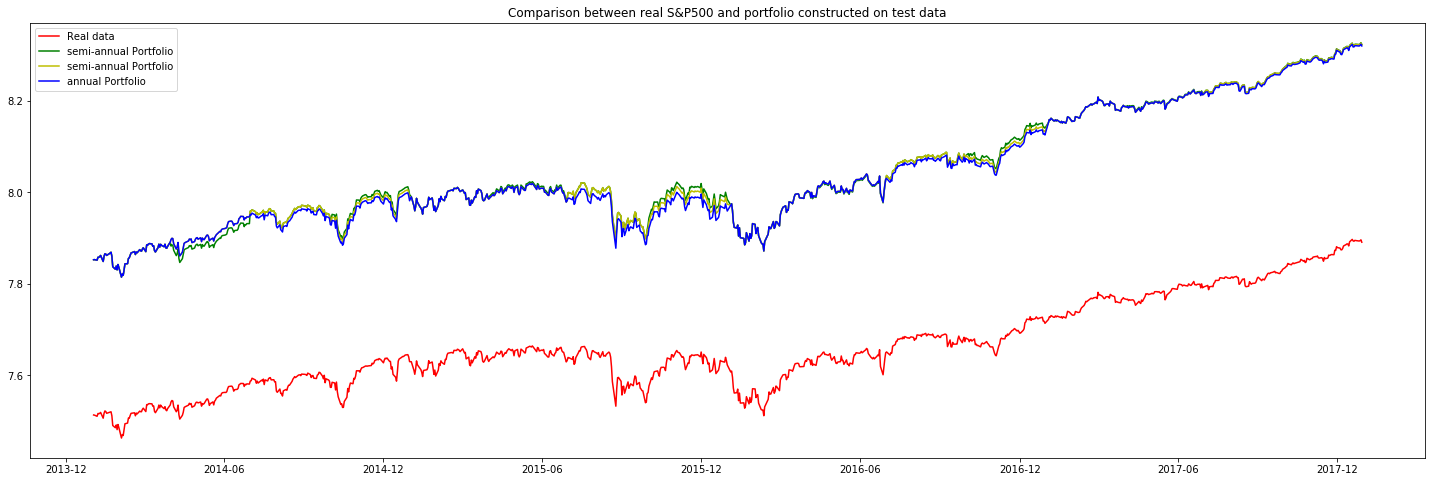

In [735]:
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
plt.figure(figsize=(25,8))
plt.plot(GSPC_log_test.index,GSPC_log_test['Adj Close'], 'r-', label='Real data' )
plt.plot(GSPC_log_test.index,portfolio_test_quarter['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'g-', label='semi-annual Portfolio' )
plt.plot(GSPC_log_test.index,portfolio_test_semi['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'y-', label='semi-annual Portfolio' )
plt.plot(GSPC_log_test.index,portfolio_test['portfolio_test_intercept'].loc["2014-01-01": "2017-12-31"], 'b-', label='annual Portfolio' )
plt.legend(loc='upper left')
plt.title('Comparison between real S&P500 and portfolio constructed on test data')
plt.show()

In [736]:
GSPC_log_test['Daily_Return'] = GSPC_log_test['Adj Close'].diff()
GSPC_log_test['Daily_Return'][0] = 0
GSPC_log_test['Cumsum Daily_Return'] = GSPC_log_test['Daily_Return'].cumsum()

In [737]:
portfolio_test_quarter['Daily_Return'] = portfolio_test_quarter['portf_forest'].diff()
portfolio_test_quarter['Daily_Return'][0] = 0
portfolio_test_quarter['Cumsum Daily_Return'] = portfolio_test_quarter['Daily_Return'].cumsum()

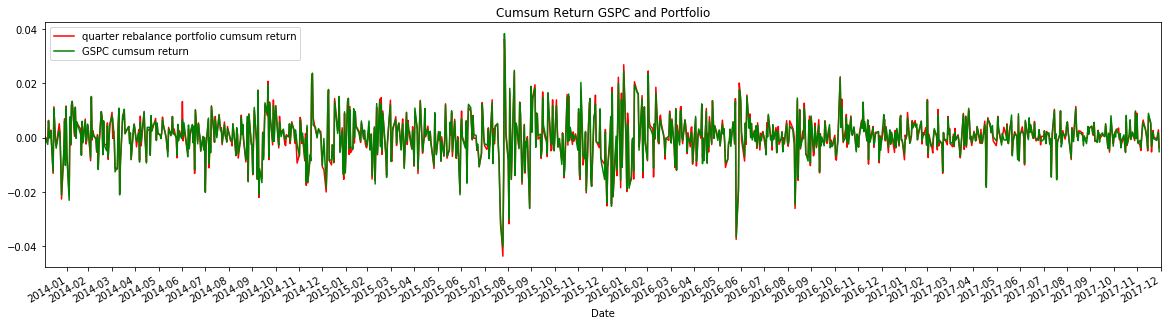

In [738]:
portfolio_test_quarter['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'quarter rebalance portfolio cumsum return',style='r-')
GSPC_log_test['Daily_Return'].loc["2014-01-01": "2017-12-31"].plot(kind='line',figsize=(20,5),label = 'GSPC cumsum return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = 'M'))
plt.title('Cumsum Return GSPC and Portfolio')
plt.show()

In [740]:
Track_error_quarter = portfolio_test_quarter['Daily_Return'] - GSPC_log_test['Daily_Return']

In [744]:
print('quarter Tracking Error Variance is %.8f') %(np.var(Track_error_quarter))

quarter Tracking Error Variance is 0.00000172


In [743]:
np.sum(Track_error_quarter**2)

0.0017337918536213717

In [746]:
print('Information ratio of the quarter portfolio is %.3f')%(np.mean(Track_error_quarter)/np.std(Track_error_quarter))

Information ratio of the quarter portfolio is 0.017


In [26]:
GSPC_log_train = GSPC_log.loc["2008-01": "2013-12-31"].copy()
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
All_ETFs_log_train = All_ETFs_log.loc["2008-01": "2013-12-31"].copy()
All_ETFs_log_test = All_ETFs_log.loc["2014-01-01": "2017-12-31"].copy()

In [27]:
LR_lasso_1 = Lasso(alpha=0.000131  , fit_intercept=True,normalize=None)
LR_lasso_1.fit(All_ETFs_log_train,GSPC_log_train[['Adj Close']])

Lasso(alpha=0.000131, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=None, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
np.sum(LR_lasso_1.coef_<0)

0

In [29]:
print np.sum(LR_lasso_1.coef_ > 0 )
print np.sum(LR_lasso_1.coef_ < 0 )
print np.sum(LR_lasso_1.coef_ == 0 )

12
0
40


In [31]:
LR_lasso_1.coef_ > 0

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True], dtype=bool)

In [33]:
a = All_ETFs_log_train.iloc[:,LR_lasso_1.coef_ > 0] 

In [37]:
a.head(4)

,XLK,XLF,IYF,IYC,XLV,IBB,XLI,VIS,XLE,IYE,XLU,USRT
Date,,,,,,,,,,,,
2008-01-02,3.095521,2.660675,4.342348,3.990660,3.372757,3.272472,3.430769,4.095256,4.157497,3.633426,3.352228,3.554688
2008-01-03,3.097051,2.654308,4.333643,3.977545,3.378749,3.277166,3.431548,4.097615,4.169252,3.639774,3.350801,3.516673
2008-01-04,3.057279,2.625508,4.305491,3.950958,3.368454,3.262143,3.410837,4.070632,4.132018,3.613619,3.358386,3.477431
2008-01-07,3.048490,2.628062,4.309081,3.956605,3.388093,3.276056,3.398308,4.062910,4.128139,3.600468,3.378952,3.479637


In [24]:
LR_lasso_1.score(All_ETFs_log_train,GSPC_log_train)

0.99943850105558096

In [28]:
LR_lasso_1_residual = GSPC_log_train.values.flatten() - LR_lasso_1.predict(All_ETFs_log_train)
check_for_stationarity(LR_lasso_1_residual.flatten(),cutoff=0.05)

p-value = 6.60098673307e-05 The series  is likely stationary.


In [29]:
LR_lasso_1.intercept_

array([ 4.12154721])

In [30]:
LR_lasso_1_residual

array([ 0.00885257,  0.0079815 ,  0.00653091, ...,  0.00563458,
        0.00682113,  0.00626687])

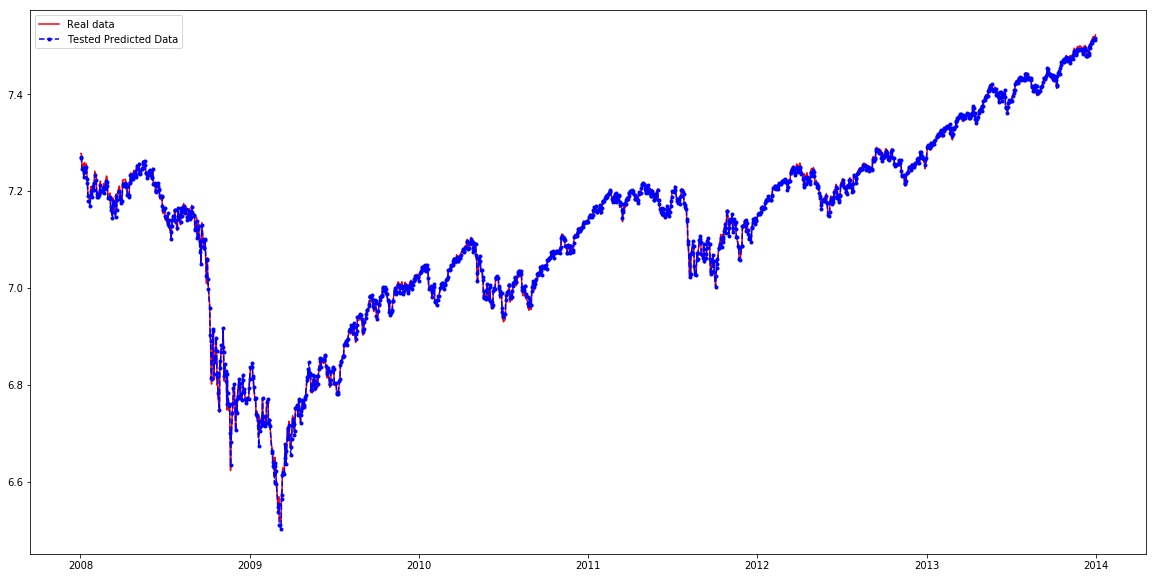

In [74]:
plt.figure(figsize=(20,10))
plt.plot(GSPC_log_train.index,GSPC_log_train, 'r-', label='Real data' )
plt.plot(All_ETFs_log_train.index,LR_lasso_1.predict(All_ETFs_log_train), 'b--.',label='Tested Predicted Data')
plt.legend(loc='upper left')
plt.show()

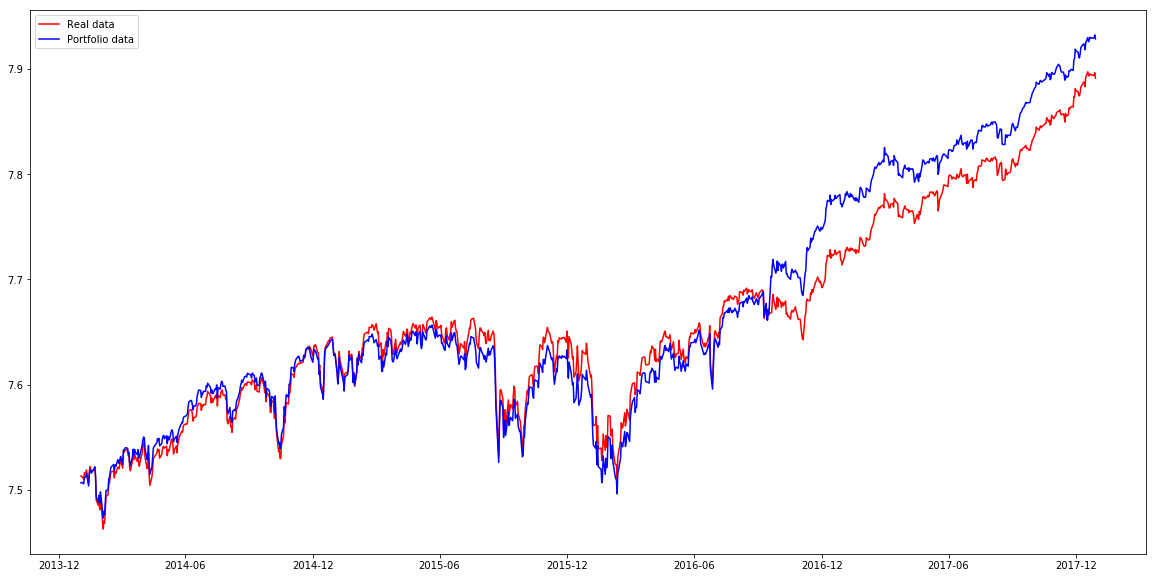

In [75]:
plt.figure(figsize=(20,10))
plt.plot(GSPC_log_test.index,GSPC_log_test, 'r-', label='Real data' )
plt.plot(All_ETFs_log_test.index,LR_lasso_1.predict(All_ETFs_log_test), 'b-', label='Portfolio data' )
plt.legend(loc='upper left')
plt.show()

## Let's normalized the coefficients, and see plot the performance of this portfolio

In [80]:
coefficients= LR_lasso_1.coef_.copy()
LR_lasso_coefficient = pd.DataFrame(data = coefficients,columns = ['Coefficients'])

LR_lasso_coefficient['Coefficients'] = LR_lasso_coefficient/LR_lasso_coefficient.sum()

In [84]:
Portfolio_test = All_ETFs_log_test.dot(LR_lasso_coefficient.values)
Portfolio_test.columns = ['Portfolio Log Value Test']

In [85]:
Portfolio_test.head()

,Portfolio Log Value Test
Date,
2014-01-02,3.730058
2014-01-03,3.730411
2014-01-06,3.728929
2014-01-07,3.735469
2014-01-08,3.735700


In [38]:
normalized_portfolio_residual = GSPC_log_test.iloc[:,0]-Portfolio_test.values.flatten()

In [39]:
ADF(normalized_portfolio_residual.values.flatten())

(-0.37704912504195309,
 0.91386080391633417,
 0L,
 1006L,
 {'1%': -3.436866962597422,
  '10%': -2.5683020002450507,
  '5%': -2.8644172846037028},
 -9582.0761302840747)

## this the log price, for S&P500, and regular coefficient portfolios, and normalized coefficients portfolio

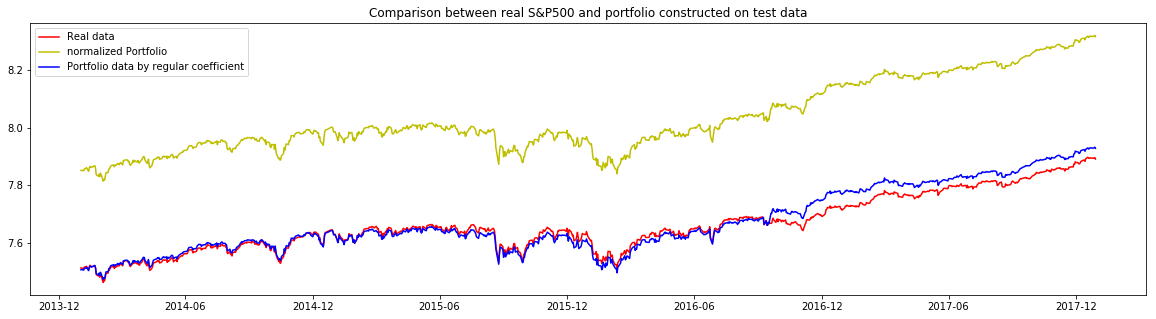

In [88]:
intercept = LR_lasso_1.intercept_.flatten()
plt.figure(figsize=(20,5))
plt.plot(GSPC_log_test.index,GSPC_log_test['Adj Close'], 'r-', label='Real data' )
plt.plot(Portfolio_test.index,Portfolio_test.values+intercept, 'y-', label='normalized Portfolio' )
plt.plot(All_ETFs_log_test.index,LR_lasso_1.predict(All_ETFs_log_test), 'b-', label='Portfolio data by regular coefficient' )
plt.legend(loc='upper left')
plt.title('Comparison between real S&P500 and portfolio constructed on test data')
plt.show()

In [89]:
GSPC_log_test = GSPC_log.loc["2014-01-01": "2017-12-31"].copy()
GSPC_log_test['Regular Index'] = GSPC.loc["2014-01-01": "2017-12-31"].copy()

In [90]:
GSPC_log_test['Daily_Return'] = GSPC_log_test['Adj Close'].diff()
GSPC_log_test['Daily_Return'][0] = 0
GSPC_log_test['Cumsum Daily_Return'] = GSPC_log_test['Daily_Return'].cumsum()

In [91]:
#GSPC_log_test.head(10)

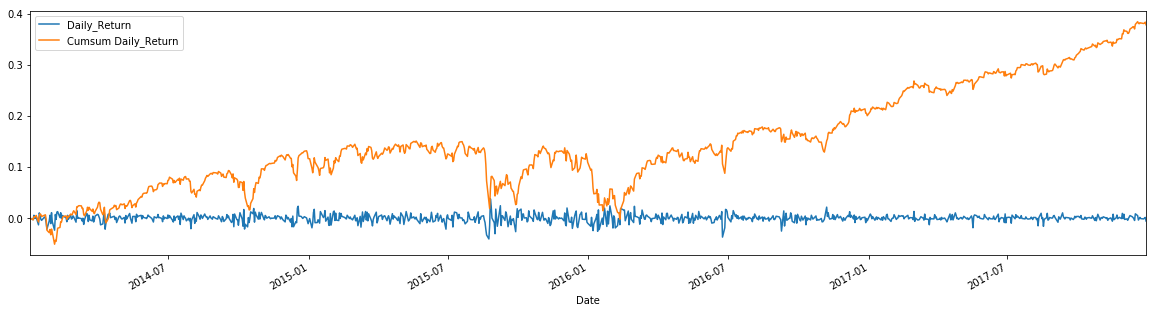

In [92]:
GSPC_log_test['Daily_Return'].plot(figsize=(20,5))
GSPC_log_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.show()

In [93]:
Portfolio_test.head()

,Portfolio Log Value Test
Date,
2014-01-02,3.730058
2014-01-03,3.730411
2014-01-06,3.728929
2014-01-07,3.735469
2014-01-08,3.735700


In [94]:
Portfolio_test['Daily_Return'] = Portfolio_test.iloc[:,0].diff()
Portfolio_test['Daily_Return'][0] = 0
Portfolio_test['Cumsum Daily_Return'] = Portfolio_test['Daily_Return'].cumsum()  

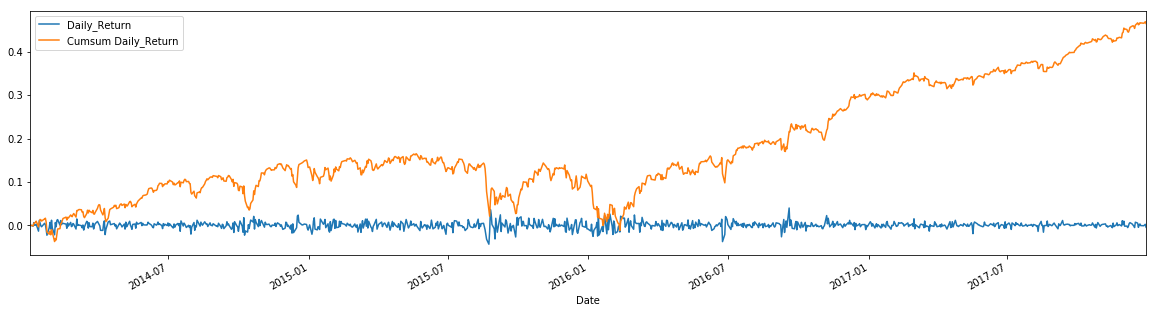

In [95]:
Portfolio_test['Daily_Return'].plot(figsize=(20,5))
Portfolio_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.show()

## Out of Sample Tracking Error Analysis
Tracking error is the difference between the portfolio return and underlying index return <br\><br\>
$ T.E. = R_{p}-R_{I}$ 

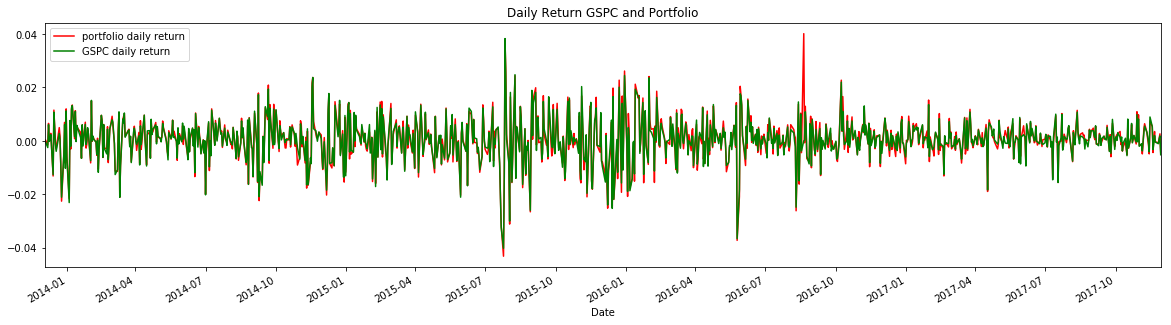

In [223]:
Portfolio_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'portfolio daily return',style='r-')
GSPC_log_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'GSPC daily return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Daily Return GSPC and Portfolio')
plt.show()

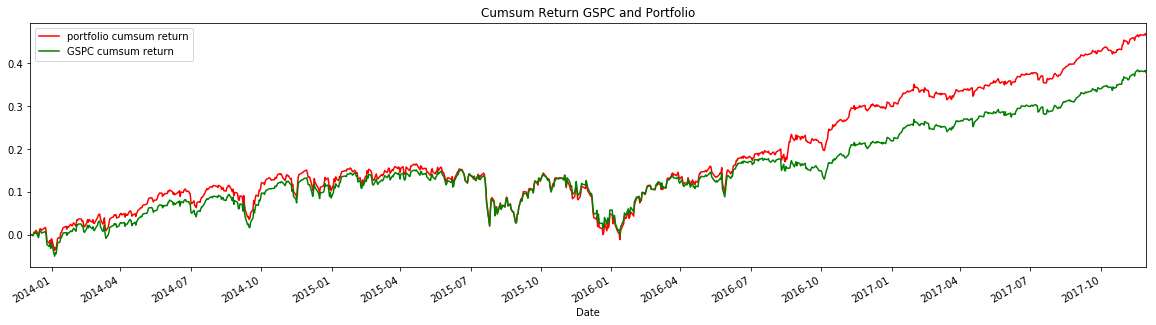

In [222]:
Portfolio_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'portfolio cumsum return',style='r-')
GSPC_log_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'GSPC cumsum return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Cumsum Return GSPC and Portfolio')
plt.show()

#### compare average return and volatility

In [228]:
GSPC_log_test['Daily_Return'].describe()

count    1007.000000
mean        0.000375
std         0.007620
min        -0.040211
25%        -0.002719
50%         0.000367
75%         0.004368
max         0.038291
Name: Daily_Return, dtype: float64

In [264]:
print('S&P 500 average daily return is %.3f%%')%(GSPC_log_test['Daily_Return'].mean() *100)
print('\nS&P 500 cumulative return is %.3f%%')%(GSPC_log_test['Cumsum Daily_Return'][-1]*100)
print('\nS&P 500 daily volatility is %.3f%%')%(GSPC_log_test['Daily_Return'].std() *100)
print('\nS&P 500 annual volatility is %.3f%%')%(GSPC_log_test['Daily_Return'].std()*(np.sqrt(252)) *100)

S&P 500 average daily return is 0.038%

S&P 500 cumulative return is 37.803%

S&P 500 daily volatility is 0.762%

S&P 500 annual volatility is 12.096%


In [265]:
print('Portfolio average daily return is %.3f%%')%(Portfolio_test['Daily_Return'].mean() *100)
print('\nPortfolio cumulative return is %.3f%%')%(Portfolio_test['Cumsum Daily_Return'][-1]*100)
print('\nPortfolio daily volatility is %.3f%%')%(Portfolio_test['Daily_Return'].std() *100)
print('\nPortfolio annual volatility is %.3f%%')%(Portfolio_test['Daily_Return'].std()*(np.sqrt(252)) *100)

Portfolio average daily return is 0.046%

Portfolio cumulative return is 46.473%

Portfolio daily volatility is 0.805%

Portfolio annual volatility is 12.776%


#### Correlation between portfolio return and index return

In [158]:
print('Correlation coefficient between portfolio and underlying index is %.6f')%(np.corrcoef(GSPC_log_test['Daily_Return'].values.flatten(),Portfolio_test['Daily_Return'].values.flatten())[0,1])

Correlation coefficient between portfolio and underlying index is 0.973889


In [164]:
Track_error = Portfolio_test['Daily_Return'] - GSPC_log_test['Daily_Return']

#### Tracking Error Variance

In [166]:
print('Tracking Error Variance is %.6f') %(np.var(Track_error)) 

Tracking Error Variance is 0.000003


In [1]:
np.sum(Track_error**2)

NameError: name 'np' is not defined

#### Information Ratio for Portfolio
\begin{equation}
IR = \frac{E(R_{p}-R_{I})}{\sqrt{Var(R_{p}-R_{I})}} 
\end{equation} 

In [170]:
print('Information ratio of the portfolio is %.3f')%(np.mean(Track_error)/np.std(Track_error))

Information ratio of the portfolio is 0.047


# Rebalance Interval
### quarterly
### semi-annually
### annually

### 1. Let's rebalance annually

# SPTR Index Tracking 

In [748]:
SPTR = web.DataReader('^SP500TR', 'yahoo', '2008-01-02', '2018-01-31')

In [750]:
with gzip.open('sptr.pkl.gz','w') as f:
    cPickle.dump(SPTR,f)

In [751]:
SPTR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,2273.409912,2273.409912,2273.409912,2273.409912,2273.409912,0
2008-01-03,2273.409912,2273.409912,2273.409912,2273.409912,2273.409912,0
2008-01-04,2217.590088,2217.590088,2217.590088,2217.590088,2217.590088,0
2008-01-07,2224.760010,2224.760010,2224.760010,2224.760010,2224.760010,0
2008-01-08,2184.669922,2184.669922,2184.669922,2184.669922,2184.669922,0


In [454]:
GSPC.head()

,Adj Close
Date,
2008-01-02,1447.160034
2008-01-03,1447.160034
2008-01-04,1411.630005
2008-01-07,1416.180054
2008-01-08,1390.189941


In [451]:
SPTR_log = np.log(SPTR[['Adj Close']].copy())
SPTR_log.head()

,Adj Close
Date,
2008-01-02,7.729036
2008-01-03,7.729036
2008-01-04,7.704176
2008-01-07,7.707404
2008-01-08,7.689220


In [455]:
SPTR_log_train = SPTR_log.loc["2008-01": "2013-12-31"].copy()
SPTR_log_test = SPTR_log.loc["2014-01-01": "2017-12-31"].copy()

In [456]:
LR_SPTR = Lasso(alpha=0.000131 , fit_intercept=True,normalize=None)
LR_SPTR.fit(All_ETFs_log_train,SPTR_log_train)

Lasso(alpha=0.000131, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=None, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [458]:
print sum(LR_SPTR.coef_ > 0 )
print sum(LR_SPTR.coef_ < 0 )
print sum(LR_SPTR.coef_ == 0 )

12
0
40


In [459]:
LR_SPTR.coef_

array([ 0.1703238 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0837548 ,  0.        ,  0.        ,  0.07053597,
        0.11685176,  0.        ,  0.04382805,  0.        ,  0.        ,
        0.        ,  0.10113234,  0.04713936,  0.        ,  0.        ,
        0.        ,  0.0876089 ,  0.01657135,  0.        ,  0.        ,
        0.13516897,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.06751208,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00885721,  0.        ])

In [460]:
np.where(LR_SPTR.coef_)

(array([ 0,  6,  9, 10, 12, 16, 17, 21, 22, 25, 43, 50], dtype=int64),)

In [462]:
All_ETFs_log_train.iloc[:,[  0,  6,  9, 10, 12, 16, 17, 21, 22, 25, 43, 50]].head()

,XLK,XLF,IYF,XLY,IYC,XLV,IBB,XLI,VIS,XLE,XLU,RWR
Date,,,,,,,,,,,,
2008-01-02,3.095521,2.660675,4.342348,3.316239,3.990660,3.372757,3.272472,3.430769,4.095256,4.157497,3.352228,3.859364
2008-01-03,3.097051,2.654308,4.333643,3.304996,3.977545,3.378749,3.277166,3.431548,4.097615,4.169252,3.350801,3.829599
2008-01-04,3.057279,2.625508,4.305491,3.273085,3.950958,3.368454,3.262143,3.410837,4.070632,4.132018,3.358386,3.786506
2008-01-07,3.048490,2.628062,4.309081,3.276646,3.956605,3.388093,3.276056,3.398308,4.062910,4.128139,3.378952,3.793198
2008-01-08,3.021648,2.590952,4.274322,3.257069,3.935566,3.396233,3.278397,3.375793,4.035699,4.110498,3.379183,3.760082


In [464]:
LR_SPTR.score(All_ETFs_log_train,SPTR_log_train)

0.99976688415512982

In [465]:
LR_SPTR_residual = SPTR_log_train.values.flatten() - LR_SPTR.predict(All_ETFs_log_train)
check_for_stationarity(LR_SPTR_residual.flatten(),cutoff=0.05)

p-value = 0.000152405444084 The series  is likely stationary.


In [466]:
LR_SPTR.intercept_

array([ 4.41664397])

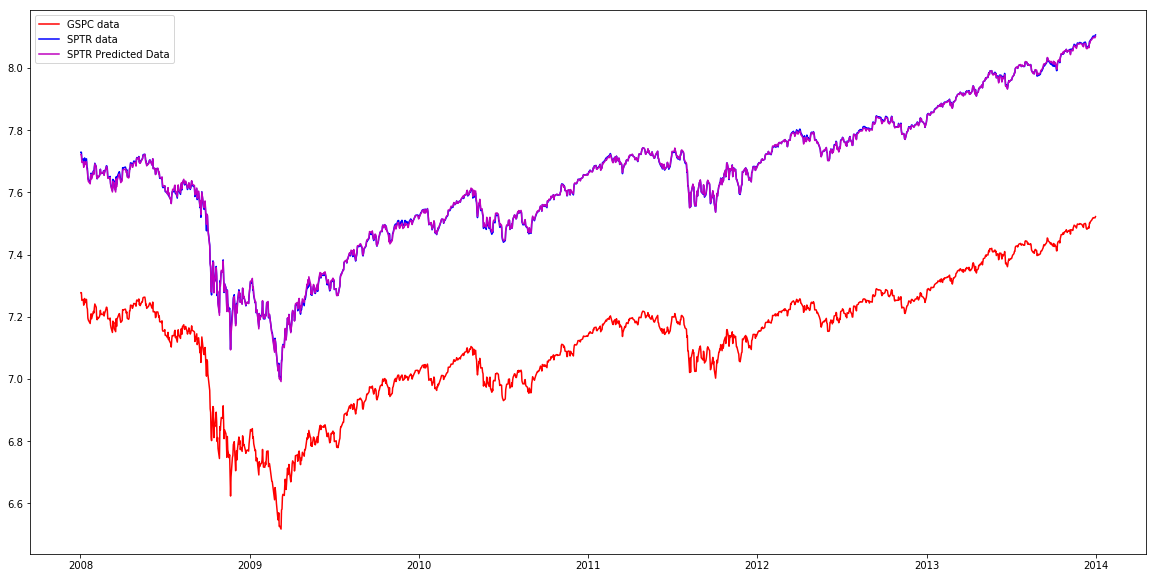

In [475]:
plt.figure(figsize=(20,10))
plt.plot(GSPC_log_train.index,GSPC_log_train['Adj Close'], 'r-', label='GSPC data' )
plt.plot(SPTR_log_train.index,SPTR_log_train, 'b-', label='SPTR data' )
plt.plot(All_ETFs_log_train.index,LR_SPTR.predict(All_ETFs_log_train), 'm-',label='SPTR Predicted Data')
plt.legend(loc='upper left')
plt.show()

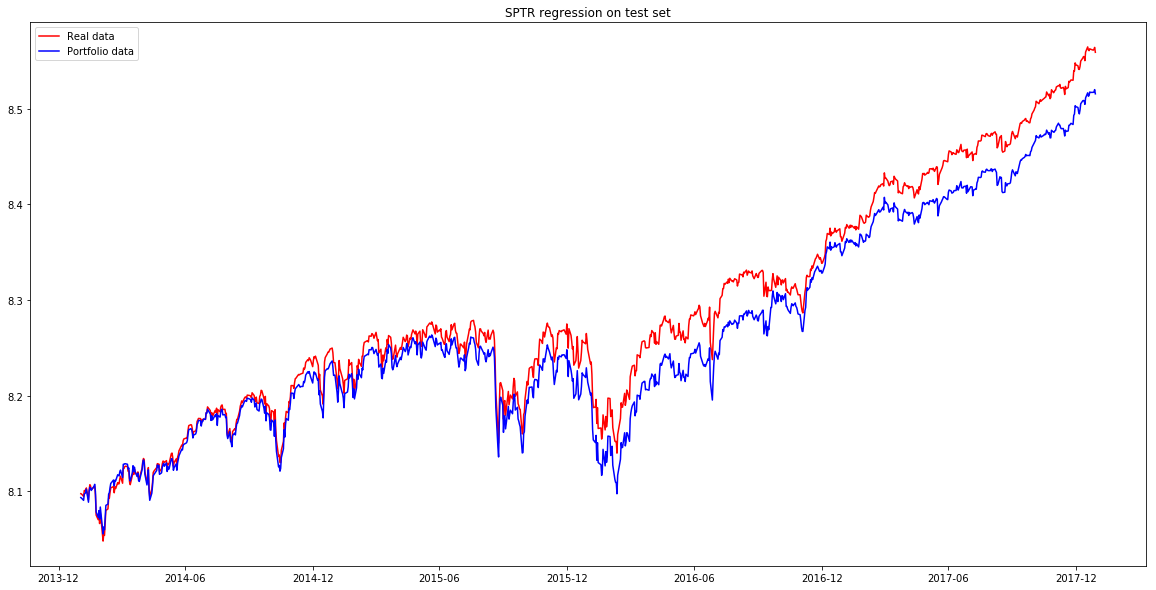

In [476]:
plt.figure(figsize=(20,10))
plt.plot(SPTR_log_test.index,SPTR_log_test, 'r-', label='Real data' )
plt.plot(All_ETFs_log_test.index,LR_SPTR.predict(All_ETFs_log_test), 'b-', label='Portfolio data' )
plt.legend(loc='upper left')
plt.title('SPTR regression on test set')
plt.show()

## For SPRT  Let's normalized the coefficients, and see plot the performance of this portfolio

In [482]:
coefficients_SPTR = LR_SPTR.coef_.copy()
LR_SPTR_coefficient = pd.DataFrame(data = coefficients_SPTR,columns = ['Coefficients'])

In [483]:
LR_SPTR_coefficient['Coefficients'] = LR_SPTR_coefficient/LR_SPTR_coefficient.sum()

In [486]:
SPTR_Portfolio_test = All_ETFs_log_test.dot(LR_SPTR_coefficient.values)
SPTR_Portfolio_test.columns = ['SPTR Log Value Test']

In [488]:
SPTR_Portfolio_test.head()

,SPTR Log Value Test
Date,
2014-01-02,3.873347
2014-01-03,3.872798
2014-01-06,3.870301
2014-01-07,3.877283
2014-01-08,3.877809


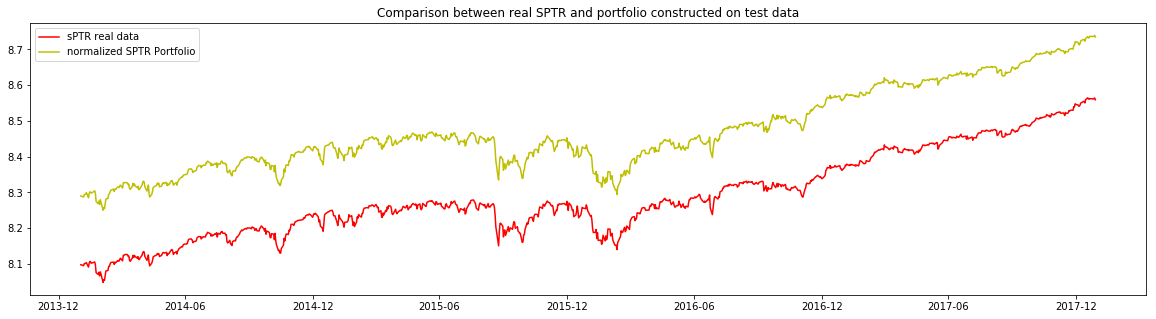

In [489]:
SPTR_intercept = LR_SPTR.intercept_.flatten()
plt.figure(figsize=(20,5))
plt.plot(SPTR_log_test.index,SPTR_log_test['Adj Close'], 'r-', label='sPTR real data' )
plt.plot(SPTR_Portfolio_test.index,SPTR_Portfolio_test.values+SPTR_intercept, 'y-', label='normalized SPTR Portfolio' )
#plt.plot(All_ETFs_log_test.index,LR_lasso_1.predict(All_ETFs_log_test), 'b-', label='Portfolio data by regular coefficient' )
plt.legend(loc='upper left')
plt.title('Comparison between real SPTR and portfolio constructed on test data')
plt.show()

In [491]:
SPTR_log_test['Daily_Return'] = SPTR_log_test['Adj Close'].diff()
SPTR_log_test['Daily_Return'][0] = 0
SPTR_log_test['Cumsum Daily_Return'] = SPTR_log_test['Daily_Return'].cumsum()

In [492]:
SPTR_log_test.head()

,Adj Close,Daily_Return,Cumsum Daily_Return
Date,,,
2014-01-02,8.097636,0.000000,0.000000
2014-01-03,8.097329,-0.000307,-0.000307
2014-01-06,8.094830,-0.002499,-0.002806
2014-01-07,8.100905,0.006075,0.003268
2014-01-08,8.100993,0.000088,0.003356


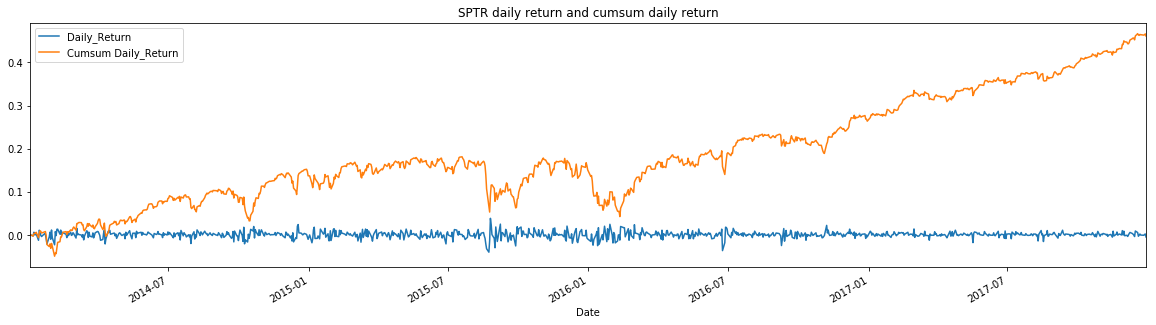

In [493]:
SPTR_log_test['Daily_Return'].plot(figsize=(20,5))
SPTR_log_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.title('SPTR daily return and cumsum daily return')
plt.show()

In [494]:
SPTR_Portfolio_test.head()

,SPTR Log Value Test
Date,
2014-01-02,3.873347
2014-01-03,3.872798
2014-01-06,3.870301
2014-01-07,3.877283
2014-01-08,3.877809


In [496]:
SPTR_Portfolio_test['Daily_Return'] = SPTR_Portfolio_test.iloc[:,0].diff()
SPTR_Portfolio_test['Daily_Return'][0] = 0
SPTR_Portfolio_test['Cumsum Daily_Return'] = SPTR_Portfolio_test['Daily_Return'].cumsum()

In [497]:
SPTR_Portfolio_test.head()

,SPTR Log Value Test,Daily_Return,Cumsum Daily_Return
Date,,,
2014-01-02,3.873347,0.000000,0.000000
2014-01-03,3.872798,-0.000549,-0.000549
2014-01-06,3.870301,-0.002498,-0.003046
2014-01-07,3.877283,0.006983,0.003937
2014-01-08,3.877809,0.000525,0.004462


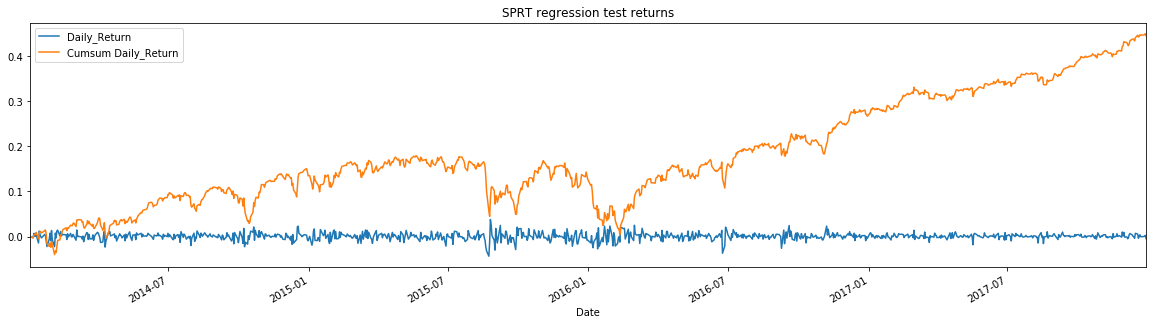

In [498]:
SPTR_Portfolio_test['Daily_Return'].plot(figsize=(20,5))
SPTR_Portfolio_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.title('SPRT regression test returns')
plt.show()


## For SPTR Out of Sample Tracking Error Analysis

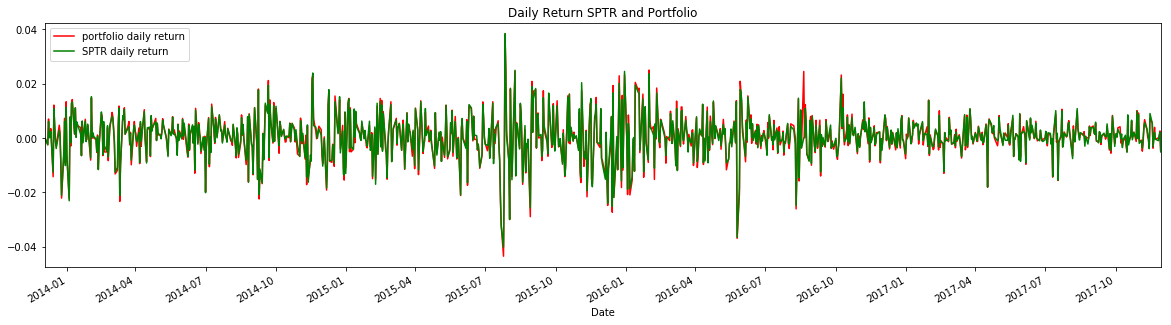

In [499]:
SPTR_Portfolio_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'portfolio daily return',style='r-')
SPTR_log_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'SPTR daily return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Daily Return SPTR and Portfolio')
plt.show()

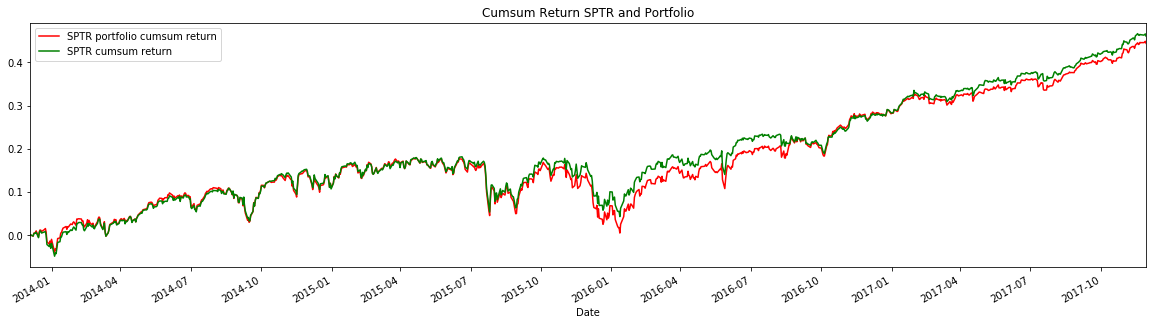

In [500]:
SPTR_Portfolio_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'SPTR portfolio cumsum return',style='r-')
SPTR_log_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'SPTR cumsum return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Cumsum Return SPTR and Portfolio')
plt.show()

#### compare average return and volatility

In [504]:
SPTR_log_test['Daily_Return'].describe()

count    1007.000000
mean        0.000458
std         0.007617
min        -0.040182
25%        -0.002630
50%         0.000499
75%         0.004450
max         0.038369
Name: Daily_Return, dtype: float64

In [505]:
print('SPTR average daily return is %.3f%%')%(SPTR_log_test['Daily_Return'].mean() *100)
print('\nSPTR cumulative return is %.3f%%')%(SPTR_log_test['Cumsum Daily_Return'][-1]*100)
print('\nSPTR daily volatility is %.4f%%')%(SPTR_log_test['Daily_Return'].std() *100)
print('\nSPTR annual volatility is %.3f%%')%(SPTR_log_test['Daily_Return'].std()*(np.sqrt(252)) *100)

SPTR average daily return is 0.046%

SPTR cumulative return is 46.123%

SPTR daily volatility is 0.7617%

SPTR annual volatility is 12.091%


In [507]:
print('SPTR Portfolio average daily return is %.3f%%')%(SPTR_Portfolio_test['Daily_Return'].mean() *100)
print('\nSPTR Portfolio cumulative return is %.3f%%')%(SPTR_Portfolio_test['Cumsum Daily_Return'][-1]*100)
print('\nSPTR Portfolio daily volatility is %.3f%%')%(SPTR_Portfolio_test['Daily_Return'].std() *100)
print('\nSPTR Portfolio annual volatility is %.3f%%')%(SPTR_Portfolio_test['Daily_Return'].std()*(np.sqrt(252)) *100)

SPTR Portfolio average daily return is 0.044%

SPTR Portfolio cumulative return is 44.449%

SPTR Portfolio daily volatility is 0.799%

SPTR Portfolio annual volatility is 12.689%


#### Correlation between portfolio return and index return

In [508]:
print('Correlation coefficient between portfolio and SPTR is %.6f')%(np.corrcoef(SPTR_log_test['Daily_Return'].values.flatten(),SPTR_Portfolio_test['Daily_Return'].values.flatten())[0,1])

Correlation coefficient between portfolio and SPTR is 0.986056


In [509]:
SPTR_Track_error = SPTR_Portfolio_test['Daily_Return'] - SPTR_log_test['Daily_Return']

#### Tracking Error Variance

In [510]:
print('SPTR Tracking Error Variance is %.6f') %(np.var(SPTR_Track_error))

SPTR Tracking Error Variance is 0.000002


In [511]:
np.sum(SPTR_Track_error**2)

0.00185101302962537

#### Information Ratio for SPTR Portfolio

In [512]:
print('Information ratio of SPTR portfolio is %.3f')%(np.mean(SPTR_Track_error)/np.std(SPTR_Track_error))

Information ratio of SPTR portfolio is -0.012


In [432]:
GSPC_log_train_5per = GSPC_log_train.copy()*1.05

In [441]:
GSPC_log_train.head()

,Adj Close,Daily_Return,Cumsum Daily_Return
Date,,,
2008-01-02,7.277358,0.000000,0.000000
2008-01-03,7.277358,0.000000,0.000000
2008-01-04,7.252500,-0.024858,-0.024858
2008-01-07,7.255718,0.003218,-0.021640
2008-01-08,7.237196,-0.018523,-0.040163


In [442]:
GSPC_log_train_5per.head()

,Adj Close,Daily_Return,Cumsum Daily_Return
Date,,,
2008-01-02,7.641226,0.000000,0.000000
2008-01-03,7.641226,0.000000,0.000000
2008-01-04,7.615125,-0.026101,-0.026101
2008-01-07,7.618504,0.003379,-0.022722
2008-01-08,7.599055,-0.019449,-0.042171


In [433]:
GSPC_log_train['Daily_Return'] = GSPC_log_train['Adj Close'].diff()
GSPC_log_train['Daily_Return'][0] = 0
GSPC_log_train['Cumsum Daily_Return'] = GSPC_log_train['Daily_Return'].cumsum()

In [434]:
GSPC_log_train_5per['Daily_Return'] = GSPC_log_train_5per['Adj Close'].diff()
GSPC_log_train_5per['Daily_Return'][0] = 0
GSPC_log_train_5per['Cumsum Daily_Return'] = GSPC_log_train_5per['Daily_Return'].cumsum()

In [437]:
GSPC_log_train_5per.head()

,Adj Close,Daily_Return,Cumsum Daily_Return
Date,,,
2008-01-02,7.641226,0.000000,0.000000
2008-01-03,7.641226,0.000000,0.000000
2008-01-04,7.615125,-0.026101,-0.026101
2008-01-07,7.618504,0.003379,-0.022722
2008-01-08,7.599055,-0.019449,-0.042171


In [438]:
GSPC_log_train.head()

,Adj Close,Daily_Return,Cumsum Daily_Return
Date,,,
2008-01-02,7.277358,0.000000,0.000000
2008-01-03,7.277358,0.000000,0.000000
2008-01-04,7.252500,-0.024858,-0.024858
2008-01-07,7.255718,0.003218,-0.021640
2008-01-08,7.237196,-0.018523,-0.040163


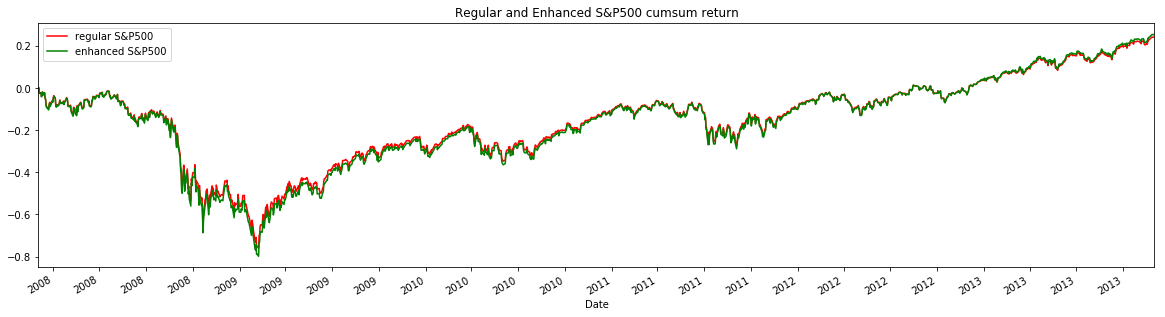

In [440]:
GSPC_log_train['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'regular S&P500',style='r-')
GSPC_log_train_5per['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'enhanced S&P500',style='g-')
#Portfolio_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'Regular Portfolio Daily_Return',style='b--')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2008-1-01', end='2014-01-01', freq = '3M'))
plt.title('Regular and Enhanced S&P500 cumsum return')
plt.show()

In [338]:

LR_lasso_EIT = Lasso(alpha=0.000131 , fit_intercept=True,normalize=None)
LR_lasso_EIT.fit(All_ETFs_log_train,GSPC_log_train_5per)

Lasso(alpha=0.000131, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=None, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [288]:
LR_lasso_EIT.coef_ 

array([ 0.19887633,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13297373,  0.        ,  0.        ,  0.08418567,
        0.        ,  0.        ,  0.00547942,  0.        ,  0.        ,
        0.        ,  0.11182353,  0.01548223,  0.        ,  0.        ,
        0.        ,  0.1058703 ,  0.05327663,  0.        ,  0.        ,
        0.14441671,  0.        ,  0.00788287,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.08599112,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0081984 ])

In [307]:
np.where(LR_lasso_EIT.coef_>0)

(array([ 0,  6,  9, 12, 16, 17, 21, 22, 25, 27, 43, 51], dtype=int64),)

In [314]:
np.where(LR_lasso_1.coef_)

(array([ 0,  6,  9, 12, 16, 17, 21, 22, 25, 27, 43, 51], dtype=int64),)

In [315]:
All_ETFs_log_train.iloc[:,[ 0,  6,  9, 12, 16, 17, 21, 22, 25, 27, 43, 51]].head()

,XLK,XLF,IYF,IYC,XLV,IBB,XLI,VIS,XLE,IYE,XLU,USRT
Date,,,,,,,,,,,,
2008-01-02,3.095521,2.660675,4.342348,3.990660,3.372757,3.272472,3.430769,4.095256,4.157497,3.633426,3.352228,3.554688
2008-01-03,3.097051,2.654308,4.333643,3.977545,3.378749,3.277166,3.431548,4.097615,4.169252,3.639774,3.350801,3.516673
2008-01-04,3.057279,2.625508,4.305491,3.950958,3.368454,3.262143,3.410837,4.070632,4.132018,3.613619,3.358386,3.477431
2008-01-07,3.048490,2.628062,4.309081,3.956605,3.388093,3.276056,3.398308,4.062910,4.128139,3.600468,3.378952,3.479637
2008-01-08,3.021648,2.590952,4.274322,3.935566,3.396233,3.278397,3.375793,4.035699,4.110498,3.586913,3.379183,3.449441


In [318]:
LR_lasso_EIT_residual = GSPC_log_train_5per.values.flatten() - LR_lasso_EIT.predict(All_ETFs_log_train)
check_for_stationarity(LR_lasso_EIT_residual.flatten(),cutoff=0.05)

p-value = 6.34694342529e-05 The series  is likely stationary.


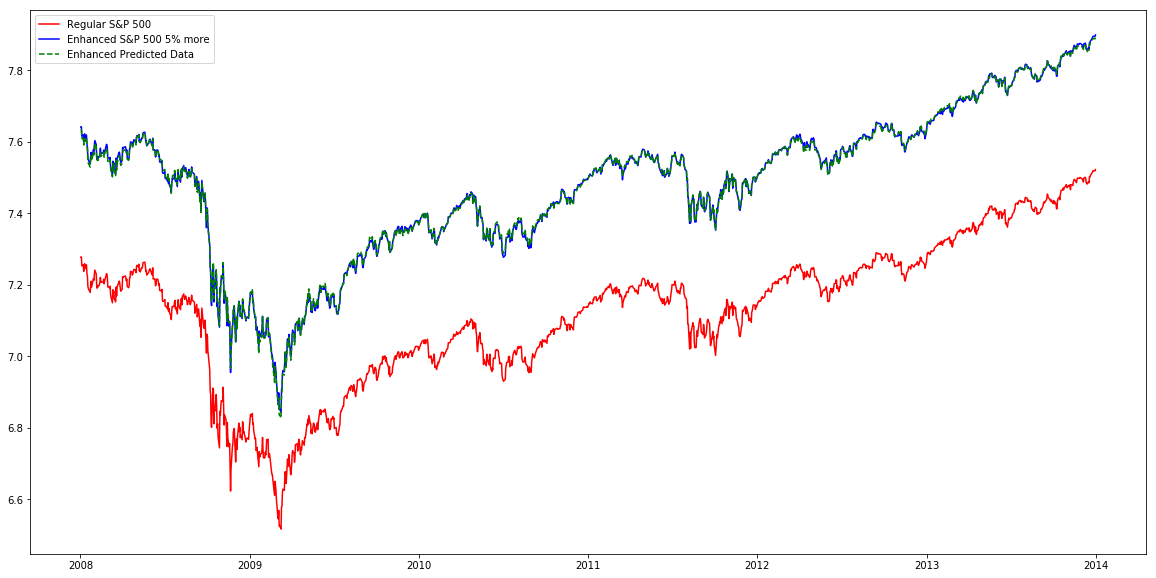

In [336]:
plt.figure(figsize=(20,10))
plt.plot(GSPC_log_train.index,GSPC_log_train, 'r-', label='Regular S&P 500' )
plt.plot(GSPC_log_train_5per.index,GSPC_log_train_5per, 'b-', label='Enhanced S&P 500 5% more' )
plt.plot(All_ETFs_log_train.index,LR_lasso_EIT.predict(All_ETFs_log_train), 'g--',label='Enhanced Predicted Data')
plt.legend(loc='upper left')
plt.show()

In [328]:
GSPC_log_train.diff().cumsum().tail()

,Adj Close
Date,
2013-12-24,0.236525
2013-12-26,0.241260
2013-12-27,0.240923
2013-12-30,0.240744
2013-12-31,0.244696


In [329]:
GSPC_log_train_5per.diff().cumsum().tail()

,Adj Close
Date,
2013-12-24,0.248352
2013-12-26,0.253323
2013-12-27,0.252969
2013-12-30,0.252781
2013-12-31,0.256930


## For Enhanced Index Tracking, Let's normalized the coefficients, and see plot the performance of this portfolio

In [337]:
LR_lasso_EIT.coef_

array([ 0.19887633,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13297373,  0.        ,  0.        ,  0.08418567,
        0.        ,  0.        ,  0.00547942,  0.        ,  0.        ,
        0.        ,  0.11182353,  0.01548223,  0.        ,  0.        ,
        0.        ,  0.1058703 ,  0.05327663,  0.        ,  0.        ,
        0.14441671,  0.        ,  0.00788287,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.08599112,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0081984 ])

In [339]:
EIT_coefficients = LR_lasso_EIT.coef_.copy()
LR_EIT_coefficient = pd.DataFrame(data = EIT_coefficients,columns = ['Coefficients'])
LR_EIT_coefficient['Coefficients'] = LR_EIT_coefficient/LR_EIT_coefficient.sum()

In [352]:
EIT_Portfolio_test = All_ETFs_log_test.dot(LR_EIT_coefficient.values)
EIT_Portfolio_test.columns = ['EIT Log Value Test']

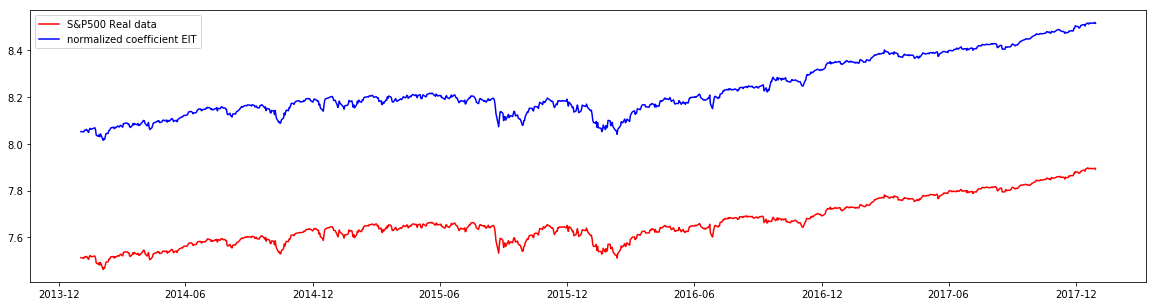

In [362]:
plt.figure(figsize=(20,5))
plt.plot(GSPC_log_test.index,GSPC_log_test['Adj Close'], 'r-', label='S&P500 Real data' )
plt.plot(GSPC_log_test.index,EIT_Portfolio_test+LR_lasso_EIT.intercept_, 'b-', label='normalized coefficient EIT' )
plt.legend(loc='upper left')
plt.show()

In [364]:
GSPC_log_test.head()

,Adj Close,Regular Index,Daily_Return,Cumsum Daily_Return
Date,,,,
2014-01-02,7.513153,1831.979980,0.000000,0.000000
2014-01-03,7.512820,1831.369995,-0.000333,-0.000333
2014-01-06,7.510305,1826.770020,-0.002515,-0.002848
2014-01-07,7.516368,1837.880005,0.006063,0.003215
2014-01-08,7.516156,1837.489990,-0.000212,0.003003


In [371]:
EIT_Portfolio_test['Daily_Return'] = EIT_Portfolio_test['EIT Log Value Test'].diff()
EIT_Portfolio_test['Daily_Return'][0]=0
EIT_Portfolio_test['Cumsum Daily_Return'] = EIT_Portfolio_test['Daily_Return'].cumsum()

In [372]:
EIT_Portfolio_test.head()

,EIT Log Value Test,Daily_Return,Cumsum Daily_Return
Date,,,
2014-01-02,3.732416,0.000000,0.000000
2014-01-03,3.732768,0.000353,0.000353
2014-01-06,3.731299,-0.001470,-0.001117
2014-01-07,3.737842,0.006543,0.005426
2014-01-08,3.738066,0.000224,0.005650


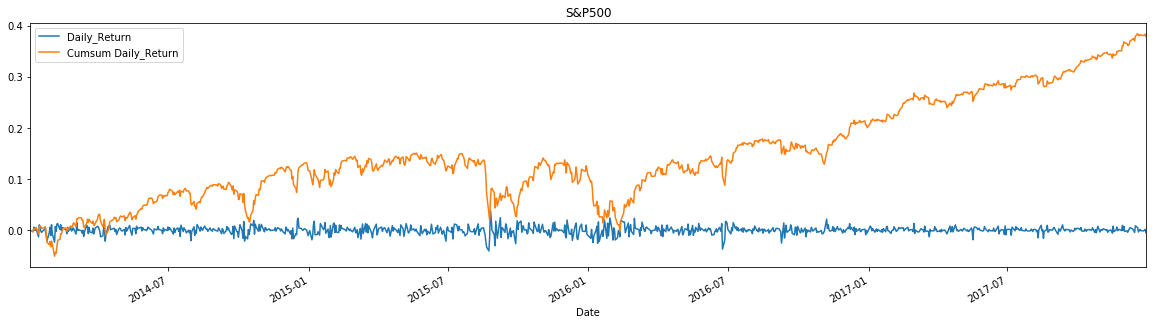

In [373]:
GSPC_log_test['Daily_Return'].plot(figsize=(20,5))
GSPC_log_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.title('S&P500')
plt.show()

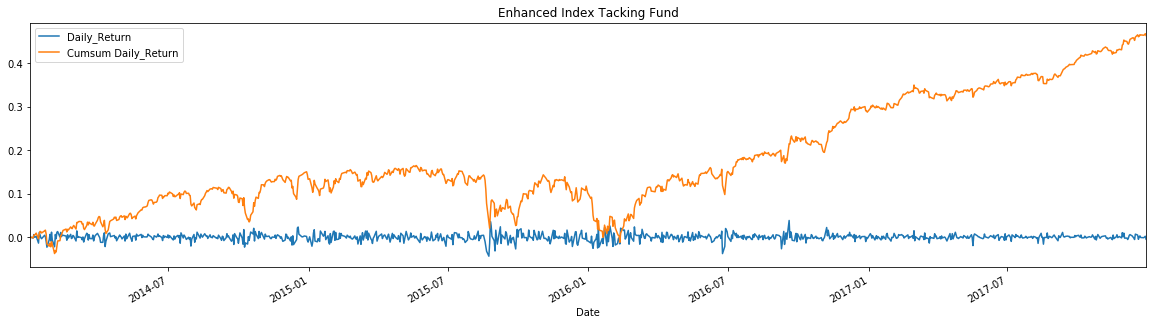

In [375]:
EIT_Portfolio_test['Daily_Return'].plot(figsize=(20,5))
EIT_Portfolio_test['Cumsum Daily_Return'].plot(figsize=(20,5))
plt.legend(loc='upper left')
plt.title('Enhanced Index Tacking Fund')
plt.show()

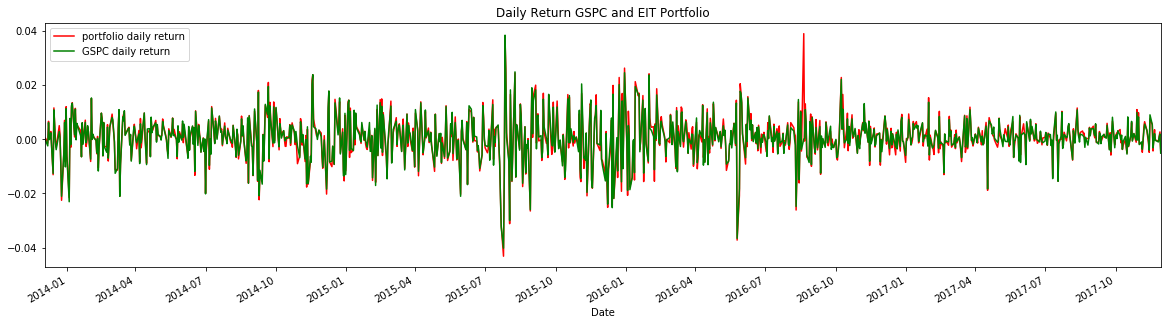

In [377]:
EIT_Portfolio_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'portfolio daily return',style='r-')
GSPC_log_test['Daily_Return'].plot(kind='line',figsize=(20,5),label = 'GSPC daily return',style='g-')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Daily Return GSPC and EIT Portfolio')
plt.show()

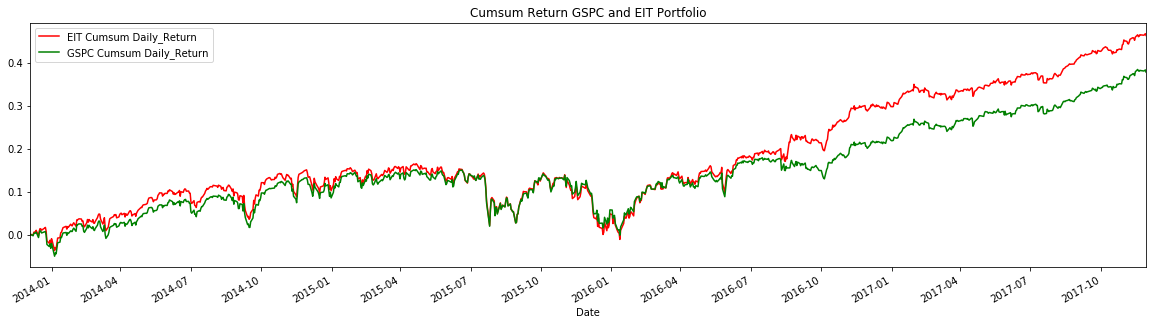

In [412]:
EIT_Portfolio_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'EIT Cumsum Daily_Return',style='r-')
GSPC_log_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'GSPC Cumsum Daily_Return',style='g-')
#Portfolio_test['Cumsum Daily_Return'].plot(kind='line',figsize=(20,5),label = 'Regular Portfolio Daily_Return',style='b--')
plt.legend(loc='upper left')
plt.xticks( pd.date_range(start='2014-1-01', end='2018-01-01', freq = '3M'))
plt.title('Cumsum Return GSPC and EIT Portfolio')
plt.show()

In [410]:
EIT_Portfolio_test.tail()

,EIT Log Value Test,Daily_Return,Cumsum Daily_Return
Date,,,
2017-12-22,4.197085,-0.000350,0.464669
2017-12-26,4.196340,-0.000746,0.463924
2017-12-27,4.197320,0.000980,0.464904
2017-12-28,4.199953,0.002634,0.467538
2017-12-29,4.195798,-0.004155,0.463383


#### compare average return and volatility

In [413]:
GSPC_log_test['Daily_Return'].describe()

count    1007.000000
mean        0.000375
std         0.007620
min        -0.040211
25%        -0.002719
50%         0.000367
75%         0.004368
max         0.038291
Name: Daily_Return, dtype: float64

In [414]:
print('S&P 500 average daily return is %.3f%%')%(GSPC_log_test['Daily_Return'].mean() *100)
print('\nS&P 500 cumulative return is %.3f%%')%(GSPC_log_test['Cumsum Daily_Return'][-1]*100)
print('\nS&P 500 daily volatility is %.3f%%')%(GSPC_log_test['Daily_Return'].std() *100)
print('\nS&P 500 annual volatility is %.3f%%')%(GSPC_log_test['Daily_Return'].std()*(np.sqrt(252)) *100)

S&P 500 average daily return is 0.038%

S&P 500 cumulative return is 37.803%

S&P 500 daily volatility is 0.762%

S&P 500 annual volatility is 12.096%


In [415]:
print('EIT_Portfolio average daily return is %.3f%%')%(EIT_Portfolio_test['Daily_Return'].mean() *100)
print('\nEIT_Portfolio cumulative return is %.3f%%')%(EIT_Portfolio_test['Cumsum Daily_Return'][-1]*100)
print('\nEIT_Portfolio daily volatility is %.3f%%')%(EIT_Portfolio_test['Daily_Return'].std() *100)
print('\nEIT_Portfolio annual volatility is %.3f%%')%(EIT_Portfolio_test['Daily_Return'].std()*(np.sqrt(252)) *100)

EIT_Portfolio average daily return is 0.046%

EIT_Portfolio cumulative return is 46.338%

EIT_Portfolio daily volatility is 0.804%

EIT_Portfolio annual volatility is 12.758%


In [14]:
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = ADF(X)[1]
    if pvalue < cutoff:
        print 'p-value = ' + str(pvalue) + ' The series '  +' is likely stationary.'
        #return True
    else:
        print 'p-value = ' + str(pvalue) + ' The series '+' is likely non-stationary.'
        #return False

In [15]:
def check_for_stationarity_no_print(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = ADF(X)[1]
    if pvalue < cutoff:
        #print 'p-value = ' + str(pvalue) + ' The series '  +' is likely stationary.'
        return True
    else:
        #print 'p-value = ' + str(pvalue) + ' The series '+' is likely non-stationary.'
        return False

In [ ]:
def get_rate(begin,end, year):
    rate = math.pow(float(end)/float(begin),1/float(year))-1
    return rate

In [ ]:
get_rate(160.42,272.64,5) # S&P500

In [ ]:
1000000*(1.17965**5)